Diese hier zur Testierung vorgelegte Lösung wurde durch
folgendes Team erarbeitet:

Erklärung:
Diese hier zur Testierung vorgelegte Lösung wurde durch folgendes Team
erarbeitet:

Studierender 1: Pana, Christian | 11117043

Studierender 2: Pooth, Matthias | 11124943

Jeder der oben genannten Studierenden erklärt hiermit folgendes:
- Die abgegebene Ausarbeitung habe ich (Name des Studierenden) zusammen
 mit dem oben genannten Teampartner eigenständig auf Basis der von der
 TH-Köln bereitgestellten Vorlagen (Softwarerahmen) erarbeitet.
- Ich bin in der Lage diese meine Ausarbeitung auf Nachfrage eigenständig zu
 erläutern und notwendige Änderungen, die sich auf Basis einer leicht geänderten
 Aufgabenstellung ergeben, zu skizzieren.
<-##














In [1]:
# Einbinden des eigenen Google-Drive
# - CLM auf den erscheinenden Link
# - Google-Koto auswaehlen
# - Die Verwendung zulassen (ggf. ganz nach unten scrollen)
# - Den angezeigten authorization code in die Zwischenablage kopieren
# - Zurueck zu dieser Seite und den authorization cade in die umrandete Box aus der Zwischenablage einfuegen
# - Die Eingabe mit RETURN abschliessen
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Definition des Basis-Verzeichnisses
# Dieses wird hier so festgelegt, dass man im Google-Drive unter 
#     /Colab_Drive/ML_TH/
# arbeitet. Das BASEDIR MUSS BEREITS EXISTIEREN, also von Hand angelegt worden sein.
BASEDIR='/content/drive/My Drive/Colab_Drive/ML_TH/'

# Weitere vorausgesetzte Verzeichnisse anlegen
import os
if os.path.exists(BASEDIR + 'Data_Input'):
  print("Das Verzeichnis  "+BASEDIR+'Data_Input'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Data_Input')

if os.path.exists(BASEDIR + 'Temp'):
  print("Das Verzeichnis  "+BASEDIR+'Temp'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Temp')

# Die ML-Lib importieren. Diese muss im zuvor definierten BASEDIR stehen
import os
os.chdir(BASEDIR)
import ML_Lib as ml
if ml.vers() < 0.9 :
  print("##########  DIE ML-LIB IST GGF. ZU ALT ###############")
  print(ml.vers())

Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Data_Input   existiert bereits
Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Temp   existiert bereits


In [3]:
# Alle weiteren immer verwendeten Libs importieren
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt

# Steuerparameter für die Kapitel dieses Notebooks

ACHTUNG: Nach der Änderung der Parameter muss die Code-Zelle auch IMMER AUSGEFÜHRT WERDEN !!!

In [4]:
LINEARE_2D_REGRESSION_KERAS = False #@param ["False", "True"] {type:"raw"}

MIN_ML_LIB_KLASSIFIKATION_SKRIPT = False #@param ["False", "True"] {type:"raw"}

MIN_KERAS_LIB_KLASSIFIKATION_SKRIPT = False #@param ["False", "True"] {type:"raw"}

MUENZKLASSIFIKATION_MIT_KERAS = False #@param ["False", "True"] {type:"raw"}

AUFGABE_1 = False #@param ["False", "True"] {type:"raw"}

AUFGABE_3 = False #@param ["False", "True"] {type:"raw"}

AUFGABE_4 = False #@param ["False", "True"] {type:"raw"}

AUFGABE_5 = True #@param ["False", "True"] {type:"raw"}


# **Linerare 2D-Regression mit Keras auf einem minimalen Datensatz  (I)**
Hier wird das minimale Beispiel zu Regression, das bisher unter Verwendung des Inverse-Matrix-Verfahrens oder des Gradientenabstiegsverfahren unter Verwendung der ML-Lib nun unter Verwendung von Keras bearbeitet.<br><br>
"Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research." (Quelle: https://keras.io/about/)

Um dieses minimale Regressionsproblem zu lösen wird unter Keras ein ebenfalls miniales Neuronalen Netz mit nur einem einzigen Neuron erstellt und trainiert.

Da dieses Neuronale Netz zu rudimentär für die Einführung in Keras ist, wird hier auf die eigentliche Verwendung von Kreas NICHT weiter eingegangen.<br><br>

Im Folgenden wird daher nur eine minimale Anwendung von Keras gezeigt, die NICHT ZUR EINARBEITUNG IN KERAS ODER ALS SCHABLONE HERANGEZOGEN WERDEN SOLLTE.<br><br>

Zur Einarbeitung in Keras anhand einer Schablone wird statt dessen auf das etwas "größere" Beispiel der Münzklassifikation verwiesen. <br><br>

In [5]:
if LINEARE_2D_REGRESSION_KERAS :

  ##################################################################################################
  #
  #                             Eine linerare 2D-Regression 
  #
  ##################################################################################################

  ##################################################################################################
  #                                         Daten
  ##################################################################################################
  # Kuenstlichen systematischen Fehler in den Trainingsdaten einbringen
  sf=0.0  # Simulation eines systematischen Fehlers in den Trainingsdaten, der dann dazu fuehrt, dass uebertrainiert wird.
          # Dies erkennt man daran dass der "Loss-Verlauf" der Testdaten ueber "sein Minimum hinaus laeuft"
          # Ein guter Wert um das Uebertrainiren zu sehen ist sf=2.0

  # Die Trainings- und Test-Daten sind von Hand erstellt und orientieren sich an der Formel 
  # y=2*x+3= w*x +b
  # "Orientieren" bedeutet, dass die Daten dem gegenueber von Hand etwas verrauscht wurden und auch mittels sf
  # die Trainingsdaten mit einem systematischen Fehler versehen wurden.

  X_train = np.array([[1.0],[2.0],[4.0],[6.0],[8.0],[10.0],[12.0], [14.0]])
  y_train = np.array([5.0+sf,7.0+sf,11.0,15.0+sf,19.0+sf,23.0+sf,27.0,31.0+sf]) # Mit benoetigtem Bias (b)

  X_test = np.array([[1.0-0.1],[2.0+0.1],[4.0-0.1],[6.0-0.1],[8.0+0.1],[10.0-0.1],[12.0+0.1], [14.1]])
  y_test = np.array([5.0,7.0,11.0,15.0,19.0,23.0,27.0,31.0]) # Mit benoetigtem Bias

  # Damit die nicht wirklich benoetigten Gewichte sofort "richtig" sind werden diese auf 0 gesetzt.
  start_coefficients = np.array([0.01,0.01]) 

  ##################################################################################################
  #                                         Parameter
  ##################################################################################################
  UNTERSUCHUNG = 0      # Hiermit koennen Sie eine kleine Untersuchung zu Auswirkung verschiedener
                        # Parameter beim Gradienetenabstiegverfahren durchfuehren

  if UNTERSUCHUNG == 0:
    # -----------                       Ausgangslage                 --------------------------
    step_size   = 0.01          # Sprungweite (Ungeduldigkeitsfaktor)
    batch_size  = 8             # Anzahl der Eingabevektoren je Mini-Batch
    max_iter    = 150           # Anzahl der Epochen
    max_value_loss_diagram = 2 # Begrenzt den im Loss-Verlauf-Diagramm dargestellten Wertebereich "nach oben hin"
    do_standardisierung = 1     # 1: Ein standardisierung der Daten wird vorgenommen, ansonsten nicht

 

  ##################################################################################################
  #                                   Optional Standardisieren
  ##################################################################################################
  if do_standardisierung == 1: 
    # Den Trainingsdatensatz bzgl. der Eingabedaten standardisierien
    X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

    # ACHTUNG:
    # Der Testdatensatz (falls er dann gebraucht wird) DARF NICHT FUER SICH standardisiert werden
    # sonder MUSS mit dem Mittelwert und der Standardabweichugn des Trainingsdatensatzes skaliert werden.
    # In der eigentlichen Problemloesung kommen die Daten ja einzeln herein und muessen auch einzeln
    # verarbeitet werden. Eine Statistik uerbe einem einzelnen Wert macht aber keinen Sinn.
    X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)


    # Wenn die Eingabedaten standardisiert werden, dann MUESSEN auch die Ausgabewerte standardisiert werden
    y_train_std, y_train_means, y_train_standard_deviations = ml.standardisation_of_matrix_columns(y_train)

    # ACHTUNG:
    # Der Testdatensatz (falls er dann gebraucht wird) DARF NICHT FUER SICH standardisiert werden
    # sonder MUSS mit dem Mittelwert und der Standardabweichugn des Trainingsdatensatzes skaliert werden.
    # In der eigentlichen Problemloesung kommen die Daten ja einzeln herein und muessen auch einzeln
    # verarbeitet werden. Eine Statistik uerbe einem einzelnen Wert macht aber keinen Sinn.
    y_test_std = ml.scale_of_matrix_columns(y_test, y_train_means, y_train_standard_deviations)



    #mean_y_train_col = ml.get_functionvalue_of_matrix_columns(y_train,ml.mean_of_matrix)
    #standard_deviation_y_train_col = ml.get_functionvalue_of_matrix_columns(y_train,ml.standard_deviation_of_matrix)
    #y_train_std = ml.scale_of_matrix_columns(y_train, mean_y_train_col, standard_deviation_y_train_col)
    #y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test

    y_train_std = y_train
    y_test_std = y_test 


  ##################################################################################################
  #      Der Bias darf hier nicht einbracht werden, denn dieser ist schon in Keras implementiert
  ##################################################################################################
  #X_train_std = ml.append_bias_column(X_train_std) 
  #X_test_std = ml.append_bias_column(X_test_std)

  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################

  import keras as keras
  from keras import models
  from keras import layers
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input



  ##################################################################################################
  #              1.)  Definition des Netzwerkes (Topologie und Aktivierungsfunktion) 
  ##################################################################################################
 
  # 1a.) Parameter fuer Definition angeben
  anz_neuronen = 1              # Anzahl Neuronen

  anz_input_je_neuron = 1       # Der Bias ist kein "echter" Input (da nur intern) und wird daher bei Keras nicht mitgezaehlt
                                # Intern wird der Bias aber sehr wohl immer mit angelegt und verwaltet.
   
  ACTIVATION_FUNCTION =  activations.linear # Art der Aktivierungsfunktion. Hier lineare Aktivierungsfunktion
  

  # 1b.) Aufruf der Netzwerk-Definition
  network = models.Sequential() 
  network.add(layers.Dense(anz_neuronen, 
                           activation=ACTIVATION_FUNCTION, 
                           input_shape=(anz_input_je_neuron,)))


  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben  
  #step_size =                          # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)
                                        # Wurde bereits unter Parameter definiert
  
  OPTIMIZER = optimizers.SGD(learning_rate=step_size)  # Art des Optimierer-Modells. Hier Minibatch. 

  LOSSES = losses.MeanSquaredError()    # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                        # wird versucht im Rahmen des Trainings zu minimieren
  
  

  METRIC = metrics.MeanSquaredError()   # Metrik fuer die Validierung. Nach jeder Epoche werden
                                        # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                        # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                        # Fehler-Wert berechnet. Naheliegend ist es als
                                        # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                        # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                  
  
  # 2b.) Aufruf des Compilierens 
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC     ])



  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  #batch_size  =            # Anzahl der Eingabevektoren je Mini-Batch
                            # Wurde bereits unter Parameter definiert

  max_epoch    = max_iter   # Anzahl der Epochen statt (wie bei der ML-Lib) Anzahl der 
                            # Gewichtsanpassungen. Da hier die Batch-Size auf die Groesse einer Epoche
                            # (naemlich 8) gesetzt wurde, ist die Anzahl der Epochen ausnahmsweise
                            # gleich der Anzahl der Gewichtsanpassungen. Ansonsten gilt 
                            # (solange die Epochengroesse ein ganzzahliges Vielfaches der Batch_Size ist):
                            # Anzahl_Gewichtsanpassungen = Epochengroesse/Batch_Size * Anzahl_Epochen
  
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_std, y_train_std, 
                        epochs=max_epoch, 
                        batch_size=batch_size, 
                        validation_data=(X_test_std, y_test_std),
                        verbose=0)

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'loss' und 'val_los') man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.ylim(0,max_value_loss_diagram )  # Die Y-Achse wird zwischen 0.0 und max_value_loss_diagram dargestellt
  plt.show()

  weights = network.layers[0].get_weights()[0]
  biases = network.layers[0].get_weights()[1]
  
  print ("Gewichte ohne Biases", weights)
  print ("Biases", biases)





# **Minimales Klassifikationsbeispiel aus dem Skript und aus der Excel-Datei (E1)**

## Nutzung der ML-Lib
Im Folgenden werden wir die minimale Problemstellung der Klassifikation (so wie im Skript aufgeführt) unter Verwendung der ML-Lib lösen.

In [6]:
if MIN_ML_LIB_KLASSIFIKATION_SKRIPT :
  ##################################################################################################
  #
  #                Das einfache Klassifikationsbeispiel aus dem Skript und aus der Excel-Datei
  #
  ##################################################################################################

  ##################################################################################################
  #                                         Daten
  ##################################################################################################  
  X_train = np.array([[1.0,1.0],[2.0,1.0],[2.0,1.0],[3.0,1.0],[6.0,1.0],[7.0,1.0],[7.0,1.0], [8.0,1.0]])
  y_train = np.array([0,0,0,0,1.0,1.0,1.0,1.0])

  # Die Testdaten sind gegenueber den Traiingsdaten bewusst recht grob verfaelscht
  X_test = np.array([[1.5,1.0],[2.5,1.0],[2.5,1.0],[3.5,1.0],[6.5,1.0],[7.5,1.0],[7.5,1.0], [8.5,1.0]])
  y_test = np.array([0,0,0,0,1.0,1.0,1.0,1.0])

  # Damit ein Vergleich mit den Berechnungen im Skript moeglich ist werden die Gewichte auf
  # die dort verwendeten Werte initialisiert.
  start_coefficients = np.array([0.4,0.1]) 

  ##################################################################################################
  #                                         Parameter
  ##################################################################################################
  step_size   = 1       # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)
  batch_size  = 8       # Anzahl der Eingabevektoren je Mini-Batch
  max_iter    = 100     # Anzahl der Gewichtsanpassungen, also wie of der Mini-Batch durchlaufen wird
  #loss_type   = "MSE_LINEAR"
  loss_type   = "MSE_LOGISTIC"            # Da eine Klassifikation statt Regression vorgenommen wird
                                          # ist nun statt der bisher verwendeten linearen  
                                          # Aktivierungsfunktion die logistische (alias sigmoide)
                                          # Aktivierungsfunktion zu verwenden.
  #loss_type   = "MSE_LINEAR_BEGRENZT"
  #loss_type   = "CEC"

  do_shuffle  = 0       # 0: Es soll je Epoche NICHT neu gemischt werden ; 1: Es soll neu gemischt werden.
  trace_level = 0       # 0: Es sollen keine Trace-Ausgabe gemacht werden
                        # 1: Je Epoche werden Ausgaben gemacht
                        # 10: Je Batch-Iteration werden Ausgaben gemacht
  do_epoche_log    = 1  # 1: Es wird nach jeder Epoche ein Log erzeugt; sonst nicht
  do_iteration_log = 1  # 1: Es wird nach jeder Iteration (also Anpassung der Gewichte) ein Log erzeugt; sonst nicht


  ##################################################################################################
  #                                         Aufruf
  ##################################################################################################
  weights, losses_epoche_train, losses_epoche_test, log_epoche_weights, _ , _ , _ = ml.gradient_descent_of_neuron(X_train,  y_train, X_test, y_test, start_coefficients,
                                                    step_size, batch_size, max_iter, loss_type, do_shuffle, trace_level, do_epoche_log, do_iteration_log)


  ##################################################################################################
  #                                Darstellung der Ergebnisse
  ##################################################################################################
  print ("\n\n-------------------------------------------------------------------------------------")
  print ("-------------------------------------------------------------------------------------")
  print ("Gewichte", weights)
  print ("Entscheidungsgrenze", weights[1]/weights[0])
  print ("Loss-Aufzeichnung :",  losses_epoche_train) # Nur aktiieren wenn max-iter nicht zu gross. Der Verlauf wird auch noch geplottet
  print ("Anzahl Epochen :",  (len(losses_epoche_train)-1))
  print ("Last Training-Loss :",  losses_epoche_train[(len(losses_epoche_train)-1)])
  print ("-------------------------------------------------------------------------------------")
  print ("-------------------------------------------------------------------------------------")


  plt.plot(losses_epoche_train, label="Train")
  plt.plot(losses_epoche_test, label="Test")
  plt.legend(loc='upper right')



In [7]:
 if MIN_ML_LIB_KLASSIFIKATION_SKRIPT :
  plt.plot(log_epoche_weights[:, 0], label="Merkmals-Gewicht")  
  plt.plot(log_epoche_weights[:, 1], label="Bias-Gewicht") 
  plt.plot(log_epoche_weights[:, 1]/log_epoche_weights[:, 0], label="Entscheidungsgrenze")  
  
  plt.legend(loc='upper right')               
  plt.xlabel("Iterationen")                   
  plt.ylabel("Werte")                 
  
  plt.show()

## Nutzung der Keras-Lib (rudimentär)
Im Folgenden werden wir die minimale Problemstellung der Klassifikation (so wie im Skript aufgeführt) unter Verwendung von Keras lösen.<br><br>
"Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research." (Quelle: https://keras.io/about/)

Da nur ein Layer mit nur einem einzigen Neuron erstellt werden muss, wird hier auf die eigentliche Verwendung von Kreas NICHT weiter eingegangen.<br><br>

Im Folgenden wird daher nur eine minimale Anwendung von Keras gezeigt, die NICHT ALS SCHABLONE ODER ALS EINARBEITUNG IN KERAS HERANGEZOGEN WERDEN SOLLTE.<br><br>

Zur Einarbeitung in Keras anhand einer Schablone wird statt dessen auf das etwas "größere" Beispiel der Münzklassifikation verwiesen. <br><br>

In [8]:
if MIN_KERAS_LIB_KLASSIFIKATION_SKRIPT :
  import keras as keras


  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      if USE_CALLBACK_ON_EPOCH_BEGIN == True:
        weights = network.layers[0].get_weights()[0]
        biases = network.layers[0].get_weights()[1]
        print ("\nw1", weights)
        print ("w0", biases)
        print ("Entscheidungsgrenze", biases[0]/weights[0][0])
    

  ##################################################################################################
  #
  #                Das einfache Klassifikationsbeispiel aus dem Skript und aus der Excel-Datei
  #
  ##################################################################################################

  ##################################################################################################
  #                                         Daten
  ##################################################################################################
  X_train = np.array([[1.0],[2.0],[2.0],[3.0],[6.0],[7.0],[7.0], [8.0]])
  y_train = np.array([0,0,0,0,1.0,1.0,1.0,1.0])

  X_test = np.array([[1.1],[2.2],[2.1],[3.0],[5.9],[6.5],[7.0], [8.4]])
  y_test = np.array([0,0,0,0,1.0,1.0,1.0,1.0])
  

  
  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################

  from keras import models
  from keras import layers

  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input


  ##################################################################################################
  #              1.)  Definition des Netzwerkes (Topologie und Aktivierungsfunktion) 
  ##################################################################################################
 
  # 1a.) Parameter fuer Definition angeben
  anz_neuronen = 1              # Anzahl Neuronen

  anz_input_je_neuron = 1       # Der Bias ist kein "echter" Input (da nur intern) und wird daher bei Keras nicht mitgezaehlt
                                # Intern wird der Bias aber sehr wohl immer mit angelegt und verwaltet.
   
  ACTIVATION_FUNCTION =  activations.sigmoid # Art der Aktivierungsfunktion. Hier logistische (alias sigmoide)
  

  # 1b.) Aufruf der Netzwerk-Definition
  network = models.Sequential() 
  network.add(layers.Dense(anz_neuronen, 
                           activation=ACTIVATION_FUNCTION, 
                           input_shape=(anz_input_je_neuron,)))


  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben  
  step_size   = 1.0     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)
  
  OPTIMIZER = optimizers.SGD(learning_rate=step_size)  # Art des Optimierer-Modells. Hier Minibatch. 

  LOSSES = losses.MeanSquaredError()    # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                        # wird versucht im Rahmen des Trainings zu minimieren
  
  

  METRIC = metrics.MeanSquaredError()   # Metrik fuer die Validierung. Nach jeder Epoche werden
                                        # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                        # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                        # Fehler-Wert berechnet. Naheliegend ist es als
                                        # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                        # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                  
  
  # 2b.) Aufruf des Compilierens 
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC     ])



  ##################################################################################################
  #                     Unueblich:  Gewichte auf definierte Startwerte setzen 
  ##################################################################################################
  # Im Beispiel aus dem Skript wurden die Gewicht mit 0.1 und 0.4 vorgegeben.
  # Dies wollen wir hier nun (aus Gruenden der Vergleichbarkeit) hier nun auch machen.
  # DIES IST ALLERDINGS SEHR UNUEBLICH !!!

  # Optional die Startwerte fuer die Gewichte vorgeben.
  # Wenn diese Option deaktiviert wird, dann werden die Gewichte von Keras beim "Compilieren" mit 
  # zufaelligen kleinen Werte intialisiert. 
  GEWICHTE_AUF_DEFINIERTE_WERTE_INITIALISIEREN = True 
  #GEWICHTE_AUF_DEFINIERTE_WERTE_INITIALISIEREN = False

  if GEWICHTE_AUF_DEFINIERTE_WERTE_INITIALISIEREN :
    # Startwerte fuer die Gewichte vorgeben
    # Hierzu zunaechst die Gewichte eines bestimmten Layers (mit dem Index "layer_index") einlesen
    # Man erhaelt eine Liste bestehend aus zwei Matrizen.
    # Das Listenelement mit dem Index 0 enthaelt eine zweidimensionale Matrix mit den "echten" eingehenden Gewichten der Neuronen
    # Das Listenelement mit dem Index 1 enthaelt einen eindimensionale Matrix mit den "internen" Bias-Gewichten der Neuronen
    layer_index = 0
    liste=network.layers[layer_index].get_weights()
    echte_gewichte = liste[0]
    bias_gewichte = liste[1]

    neuron_index = 0
    gewichts_index = 0
    echte_gewichte[neuron_index][gewichts_index] = 0.4 # Setzt das Gewicht mit dem Index "neuron_index" des Neurons mit dem Index "gewichtsindex" auf den Wert 0.4


    neuron_index = 0
    gewichts_index = 0
    bias_gewichte[neuron_index]=0.1                # Setzt das Bias-Gewicht des Neurons mit dem Index 0 auf den Wert 0.1

    liste[0] = echte_gewichte
    liste[1] = bias_gewichte 

    network.layers[0].set_weights(liste)
  
 
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 8       # Anzahl der Eingabevektoren je Mini-Batch

  max_epoch    = 50     # Anzahl der Epochen statt (wie bei der ML-Lib) Anzahl der 
                        # Gewichtsanpassungen. Da hier die Batch-Size auf die Groesse einer Epoche
                        # (naemlich 8) gesetzt wurde, ist die Anzahl der Epochen ausnahmsweise
                        # gleich der Anzahl der Gewichtsanpassungen. Ansonsten gilt 
                        # (solange die Epochengroesse ein ganzzahliges Vielfaches der Batch_Size ist):
                        # Anzahl_Gewichtsanpassungen = Epochengroesse/Batch_Size * Anzahl_Epochen
  
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train, y_train, epochs=max_epoch, batch_size=batch_size, 
                        callbacks=[CustomCallback()],  
                        validation_data=(X_test, y_test))

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'loss' und 'val_los') man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  #plt.ylim(0.0, 0.1 )                       # Die Y-Achse wird zwischen 0.0 und 0.1 dargestellt
  plt.show()

  weights = network.layers[0].get_weights()[0]
  biases = network.layers[0].get_weights()[1]
  
  print ("Gewichte ohne Biases", weights)
  print ("Biases", biases)
  print ("Entscheidungsgrenze", biases[0]/weights[0][0])




# **Muenzklassifikation mit Keras (E2)**
Hier wird das aus dem Skript bekannte Problem der Münzklassifikation gelöst.<br><br>
Die Daten werden in Form der Pandas-CSV-Datei "muenzen.csv" bereit gestellt.<br>




## a.) Einlesen und Visualisierung der Daten

In [9]:
if MUENZKLASSIFIKATION_MIT_KERAS :
  #################################################################
  #   Die gespeichert Pandas-Datei einlesen 
  #   und X_Train, y_train erzeugen
  #################################################################
  DATEIPFAD = BASEDIR + '/Data_Input/' + 'muenzen.csv'

  # Aus Datei einlesen
  df_in=pd.read_csv(DATEIPFAD)


  X_train       = ml.pandas_to_numpy_matrix(df_in, ['Durchmesser','Farbe'])
  y_train_label = ml.pandas_to_numpy_matrix(df_in, ['Cent'])

  # Plot von X_train
  plt.plot(X_train[:,0], X_train[:,1], 'bo', alpha=0.3)
  plt.axis('equal')
  plt.show()

  print("Entgegen dem Skript ist in diesem Plot der Ursprung UNTEN/LINKS und nicht OBEN/LINKS")
  print("Die Anordnung ist also wie folgt")	
  print("     Oben links (M0): 1 Cent		     	Oben rechts (M1): 5 Cent")
  print("	         Unten Mitte (M2): 10 Cent	    	Unten rechts(M3): 20 Cent ")
  print("	 ")

  # Kontrollausgabe von x_train und y_train_label fuer die ersten 20 Werte
  #for i in range(y_train.shape[0]):  # Kann gerne alternativ verwendet werden
                                      # Ist aber recht "laenglich"
  for i in range(20):
    print(X_train[i], y_train_label[i])


## b.) One-Hot-Kodierung des Ausgabedaten

Die in y_train_label enthaltenen Label sind noch nicht die Soll-Ausgabevektoren des NN. Die Soll-Ausgabevektoren müssen soviel Komponenten enthalten wie Klassen unterschieden werden sollen. Nur die Koponente die zu der "richtigen Klasse gehört" soll jeweils den Wert 1 haben alle anderen Komponenten den Wert 0. <br><br>
Dies Art der Koodierung nennt man "ONE-HOT-KODIERUNG" oder auch "1-AUS-N-Kodierung".

In [10]:
if MUENZKLASSIFIKATION_MIT_KERAS :
  # Die in y_train_label stehenden Cent-Werte nach gemaess der ONE-HOT-Kodierung" in
  # Sollausgebvektoren umwandeln und in y_train speichern.
  # Es soll gelten: [M0=1,M1=5,M2=10,M3=20] 


  y_train = np.full((y_train_label.shape[0],4), 0)

  for i in range(y_train_label.shape[0]):
    if   y_train_label[i] == 1 :
      y_train[i] = [1.0,0.0,0.0,0.0]
    elif y_train_label[i] == 5:
      y_train[i] = [0.0,1.0,0.0,0.0]
    elif y_train_label[i] == 10:
      y_train[i] = [0.0,0.0,1.0,0.0]
    elif y_train_label[i] == 20:
      y_train[i] = [0.0,0.0,0.0,1.0]
    else:
      y_train[i] = [0.0,0.0,0.0,0.0]
      
  # Kontrollausgabe von x_train, y_train (also der Sollausgabevektoren des NN)
  # und y_train_label fuer die ersten 20 Werte
  for i in range(20):
    print(X_train[i], y_train[i], y_train_label[i])


## c.) Standardisierung der Daten 

So wie es aussieht ist dieses Problem ohne eine Standardisierung der Eingabedaten nicht wirklich lösbar obwohl es ganz eindeutig ein gute Lösung gibt.
Nur wird diese nicht gefunden.<br>
Ohne Standardisierung bleibt des Training immer in einem Nebenminimum "hängen". Dieses Nebenminimum liegt in der Regel dann dort, wo
immer nur eine einzige Klasse klassifiziert wird, was ja in ca. 25% (eine von vier Klassen) der Fälle auch richtig ist.<br>
Diese schlechte Konvergenz ist wie folgt begründbar: <br>
>1.) **Die Merkmalswerte liegen alle im Bereich von +100 was dann gegenüber dem Bias (mit Wert 1) 100 mal größer ist.** Dies bewirkt, dass die Entscheidungsgrenzen vornehmlich rotieren und sich kaum verschieben. Die notwendige Verschiebung (die ja durch den Bias und somit durch die Bias-Wert bewirkt werden) sind recht klein und bleiben damit quasi aus. Wenn es dann bei dem reinen Rotieren auch noch relativ gute und breite Nebenminima gibt so ist die Wahrscheinlichkeit recht hoch, dass das Training "darin hängen bleibt".<br>
>2.) **Die Merkalswerte sind alle positiv.** Typischerweise initialisiert man die Gewicht mit kleinen Zufallswerten. Dies bewirkt dass die sigmoiden Funktionen de facto ihren Nulldurchgang in der Nähe des Nullpunkte haben. Somit geht auch die Entscheidungsgrenze "fast durch den Ursprung". Da die Entscheidungsgrenzen ja trennen sollen ist es somit dienlich wenn Merkmalswerte schon direkt beim Start des Trainings "rechts und links" der Entscheidungsgrenze liegen. Dies hier (ohne Standardisierung) bei weitem nicht der Fall.
<br><br>
**Die Standardisierung in Verbindung mit kleinen Startwerten für die Gewichte sorgt also oftmals für einen guten Startpunkt für die Minimumsuche im Fehlergebirge.**<br><br>
Sie können ja selbst einmal versuchen ob Sie mit geeigneten Trainingsparametern ohne Standardisierung eine gute Lösung "finden".


In [11]:
STANDARDISIERUNG = 1

if MUENZKLASSIFIKATION_MIT_KERAS :
  #Aufteilen der Daten in Trainings-,Validierungs und Testdatensatz
  X_train, X_test, X_validation, y_train, y_test, y_validation  = ml.split_matrix_horizontal(X_train, y_train)


  if STANDARDISIERUNG == 1:
    # Standardisierung der Eingabedaten
    X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

    X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)
    X_validation_std = ml.scale_of_matrix_columns(X_validation, x_train_means, x_train_standard_deviations)


    # Standardisierung der Ausgabedaten
    # Da wir hier verschiedene Klassen haben, die als Vektoren kodiert sind, 
    # macht eine Standardisierung der One-Hot-Kodierung keinen Sinn
    y_train_std = y_train
    y_validation_std = y_validation
    y_test_std = y_test

      
  else:
    X_train_std = X_train
    y_train_std = y_train
    X_validation_std = X_validation
    y_validation_std = y_validation
    X_test_std = X_test
    y_test_std = y_test

  #Plot von X_train_std
  plt.title("Plot von X_train_std")
  plt.plot(X_train_std[:,0], X_train_std[:,1], 'bo', alpha=0.3)
  plt.axis('equal')
  plt.show()

  #Plot von X_validation_std
  plt.title("Plot von X_validation_std")
  plt.plot(X_validation_std[:,0], X_validation_std[:,1], 'bo', alpha=0.3)
  plt.axis('equal')
  plt.show()

  #Plot von X_test_std
  plt.title("Plot von X_test_std")
  plt.plot(X_test_std[:,0], X_test_std[:,1], 'bo', alpha=0.3)
  plt.axis('equal')
  plt.show()


In [12]:
if MUENZKLASSIFIKATION_MIT_KERAS :
  print(X_test_std.shape)
  print(x_train_means, x_train_standard_deviations)

## d.) Definition, Compilierung und Training des NN

In [13]:
if MUENZKLASSIFIKATION_MIT_KERAS :
  import keras as keras

  # Keras unterstuetzt (vermulich historisch bedingt) zwei verschiedene Arten der 
  # Definition der Netzwerktopologie:
  # 1.) Sequential-API: Dieses ist ausschliesslich dafuer ausgelegt 
  #     "Multi-Layer-Perceptrons" zu definieren, also solche Topologien, bei denen alle
  #     Ausgaben der Schicht N auf alle Neuronen der Schicht N+1 gehen und es keine
  #     Rueckkopplungen gibt. Vermutlich war dies zunächst das einzige API.
  # 2.) Functional-API: Mit dieser API können neben "Multi-Layer-Perceptrons"
  #     nahezu beliebige Topologien definiert werden. Dies ist also das 
  #     maechtigere Interface.

  #USED_API = "Sequential"
  USED_API = "Functional"

  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  # Keras erlaubt es fuer verschiedene "Zeitpunkte" des Trainigs und des Testes
  # sogenannte Call-Back-Funktionen (kurz Call-Backs) anzugeben. Diese Call-Backs
  # werden durch Keras beim Erreichen des jeweiligen "Zeitpunktes" aufgerufen.
  # Call-Backs werden haeufig fuer Monitoringzwecke genutzt
  # aber auch zur Sicherungen des aktuellen Trainingsstandes
  # des Netzes (z.B. Sicherung aller Gewichte nach jeder Epoche).
  # Im Folgenden sind die typischen von Keras unterstuetzten Call-Backs (Zeitpunkte)
  # aufgefuehrt. Wir verwenden de facto aber nur den Call-Back fuer 
  # den "Zeitpunkt" on_epoch_begin. Dieser wird also jeweils zu Anfang einer
  # Epoche aufgerufen.
  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      # Leider ist es so, dass bei Verwendung der Functional-API die Multiplexer-Schicht
      # mitgezaehlt wird un den Index 0. Der erste "echte" Layer hat dann den Index 1 uws.
      # Dagegen wird bei der Verwendung der Sequential-API die Multiplexer-Schicht nicht mitgezaehlt.
      # Der erste "echte" layer hat hier dann den Index 0.
      # Daher ist hier die nun folgende Fallunterscheidung notwendig

      if USE_CALLBACK_ON_EPOCH_BEGIN == True:
        if USED_API == "Sequential" :
          weights_layer1 = network.layers[0].get_weights()[0] 
          biases_layer1 = network.layers[0].get_weights()[1]  
          weights_outputlayer = network.layers[1].get_weights()[0] 
          biases_outputlayer = network.layers[1].get_weights()[1]   

        if USED_API == "Functional" :
          weights_layer1 = network.layers[1].get_weights()[0] 
          biases_layer1 = network.layers[1].get_weights()[1] 
          weights_outputlayer = network.layers[2].get_weights()[0]
          biases_outputlayer = network.layers[2].get_weights()[1] 

        
        print ("Gewichte Layer 1: ", weights_layer1)
        print ("Gewichte Layer 2: ", weights_outputlayer)
        print ("Bias Layer 1", biases_layer1)
        print ("Bias Layer 2", weights_outputlayer)
    
    # Hier die weiteren typischen Call-Backs, die jeweils nur mit einer
    # Dummy-Funktionalitaet versehen sind
    def on_train_begin(self, logs=None):
        dummy = 1
    def on_train_end(self, logs=None):
        dummy = 1
    def on_epoch_end(self, epoch, logs=None):
        dummy = 1
    def on_test_begin(self, logs=None):
        dummy = 1
    def on_test_end(self, logs=None):
        dummy = 1
    def on_predict_begin(self, logs=None):
        dummy = 1
    def on_predict_end(self, logs=None):
        dummy = 1
    def on_train_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_train_batch_end(self, batch, logs=None):
        dummy = 1
    def on_test_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_test_batch_end(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_end(self, batch, logs=None):
        dummy = 1

      


  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################
  
  from keras import models
  from keras import layers  
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input

  # Wird benoetigt wenn eine Zufallsverteilung der Gewichtswerte vorgegeben werden soll
  from tensorflow.keras import initializers


  if USED_API == "Sequential" :
    ##################################################################################################
    #                       1.)  Definition des Netzwerkes mittels Sequential-API
    #
    # Die Sequential-API ist nicht so maechtig wie die Functional-API. Daher wird die
    # Sequential-API hier nur einmalig kurz vorgestellt.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_std.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols
 
    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 20

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 20

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols   

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid   

    # Weitere ACTIVATION_FUNCTION, die wir noch kennen lernen werden (bzw. schon kennen gelernt haben) sind:
    #ACTIVATION_FUNCTION =  activations.linear
    #ACTIVATION_FUNCTION =  activations.softmax
    #ACTIVATION_FUNCTION =  activations.relu
    #ACTIVATION_FUNCTION =  activations.tanh
    
    
    # 1b.) Aufruf der Netzwerk-Definition
    network = models.Sequential()

    # Definition der Eingabeschicht und der ersten verdeckten Schicht 
    network.add(layers.Dense(anz_neuronen_erste_verdeckte_schicht,   # Anzahl Neuronen in der ersten verdeckten Schicht
                            activation=ACTIVATION_FUNCTION, # Art der Aktivierungsfunktion
                            input_shape=[anzahl_merkmale],  # Anzahl der Merkmale (also ohne Biases)
                                                            # Diese Angabe ist nur bei der Engabeschicht notwendigt,
                                                            # denn bei den weiteren Schichten ergibt sich 
                                                            # dieser Wert aus der Anzahl der Ausgabewerte 
                                                            # der vorhergehende Schicht
                             
                            # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                            # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                            # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                            # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                            # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                            # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                            kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.5), # Initialisierung der "normalen" Gewichte
                            bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.5)    # Initialisierung der Bias-Gewichte
                            ))

    # Definition der zweiten verdeckten Schicht 
    network.add(layers.Dense(anz_neuronen_zweite_verdeckte_schicht,   # Anzahl Neuronen im Layer
                            activation=ACTIVATION_FUNCTION,           # Art der Aktivierungsfunktion
                                                                # Die Anzahl der Eingabewerte ergibt sich automatisch 
                                                                # aus der Anzahl der Ausgabewerte des vorhergehenden Layers
                            # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.
                            ))

    # Definition des Ausgabe-Layers
    network.add(layers.Dense(anz_neuronen_ausgabeschicht,               # Anzahl Neuronen im Layer
                            activation=ACTIVATION_FUNCTION              # Art der Aktivierungsfunktion
                                                                # Die Anzahl der Eingabewerte ergibt sich automatisch 
                                                                # aus der Anzahl der Ausgabewerte des vorhergehenden Layers
                            # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.
                            ))

  if USED_API == "Functional" :
    ##################################################################################################
    #                     1.)  Definition des Netzwerkes mittels Functional-API
    #
    # Die Functional-API ist deutlich maechtiger als die Sequentional-API. 
    # Mit der Functional-API lassen sich z.B. Datenstroem (Layer) auch aufteilen und wieder 
    # zusammen fuehren.
    # Daher werden wir fortan mit der Functional API arbeiten.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_std.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols

    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 20

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 20

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols 

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid   

    # Weitere ACTIVATION_FUNCTION, die wir noch kennen lernen werden (bzw. schon kennen gelernt haben) sind:
    #ACTIVATION_FUNCTION =  activations.linear
    #ACTIVATION_FUNCTION =  activations.softmax
    #ACTIVATION_FUNCTION =  activations.relu
    #ACTIVATION_FUNCTION =  activations.tanh      


    # 1b.) Aufruf der Netzwerk-Definition
    
    # Ganz links stehen die Ausgabe-Tensoren, ganz rechts (bzw. unten) die Eingabetensoren
    input_layer    = Input             (shape=(anzahl_merkmale)) # Anzahl der Merkmalswerte die gemultiplext werden muessen

    hidden_layer_1 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION,
                                        # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                                        # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                                        # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                                        # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                                        # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                                        # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                                        kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05), # Initialisierung der "normalen" Gewichte
                                        bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05)    # Initialisierung der Bias-Gewichte
   
                                       )                             ( input_layer )

    hidden_layer_2 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                            ( hidden_layer_1 )

    output_layer   = layers.Dense      (anz_neuronen_ausgabeschicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                             ( hidden_layer_2 )



    network = models.Model( input_layer, output_layer) 



  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben
  step_size   = 0.1     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)

  OPTIMIZER = optimizers.SGD(learning_rate=step_size) # Art des Optimierer-Modells. Bisher haben wir nur das
                                                      # einfache Gradientenabstiegsverfahren, hier
                                                      # SDG (Stochastic-Gradient-Descent) genannt, kennen gelernt.
                                                      # Eigentlich ist SDG (gemaess dem ML-Skript aber auch gemaess
                                                      # vieler weitere Literaturquellen) der falsche Name.
                                                      # Es muesste eigentlich Mini-Batch genannt werden,
                                                      # denn eine Batch-Size kann und wird gleich auch noch angegeben.

  # Weitere OPTIMIZER, die wir noch kennen lernen werden sind:
  #OPTIMIZER = optimizers.Adam()
  #OPTIMIZER = optimizers.RMSprop()
  #OPTIMIZER = optimizers.Adagrad()
  
 

  
  LOSSES = losses.MeanSquaredError()                  # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                                      # wird versucht im Rahmen des Trainings zu minimieren
  
  # Weitere LOSSES die wir noch kennen lernen werden sind:
  #LOSSES = losses.CategoricalCrossentropy()
  #LOSSES = losses.BinaryCrossentropy()



  METRIC_1 = metrics.MeanSquaredError()               # Metrik fuer die Validierung. Nach jeder Epoche werden
                                                      # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                                      # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                                      # Fehler-Wert berechnet. Naheliegend ist es als
                                                      # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                                      # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                      # Im Falle einer Klassifikation macht die Accuracy als
                                                      # Metrik Sinn.
                                                      
  METRIC_2 = metrics.CategoricalAccuracy()            # Es koennen auch mehrere Metriken angegeben werden, 
                                                      # die dann auch alle berechnet werden. 
                                                      #
                                                      # Die hier ausgewaehlte  CategoricalAccuracy ist
                                                      # fuer die Anwendung auf One-Hot-Ausgabevektoren 
                                                      # vorgeshehen und berechnet mit welcher prozentualen
                                                      # Haeufigkeit der Ist-Ausgabevektor
                                                      # (wenn dieser noch einer "Maxwert-Bereinigung" unterzogen wird,
                                                      # d.h. die Komponente mit dem maximalen Wert wird auf 1 gesetzt,
                                                      # alle anderen Komponenten werden auf 0 gesetzt) 
                                                      # dem Soll-Ausgabevektor entspricht. 
                                                      # Eine so berechnete Accuracy von 1.0 entspricht 
                                                      # dann einer prozentualen Haeufigkeit von 100%.  

  # Weitere Metriken die wir noch kennen lernen sind
  #METRIC = metrics.CategoricalCrossentropy()
  #METRIC = metrics.BinaryCrossentropy()


  # 2b.) Aufruf des Compilierens mit einer Metrik
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC_1 ,  METRIC_2  ])
  

  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 4      # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 50    # Anzahl der Epochen, die Trainiert werden soll
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_std,                    # Eingabedaten  
                        y_train_std,                    # Ausagbedaten
                        epochs=max_epochs,                # Anzahl Epochen die trainiert werden soll
                        batch_size=batch_size,          # Batch-Size
                        callbacks=[CustomCallback()],   # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                        verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                        validation_data=(X_validation_std, y_validation_std) # Angabe der Validierunsgdaten
                                                                             # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                        )
  
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Testdaten:")
  print("-------------------------")
  score = network.evaluate(X_test_std, y_test_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  
  # Zur Uebersichtlichkeit hier noch einmal eine etwas formartierte Ausgabe der Losses und Metriken
  print('Test Losses,   also MSE:',       score[0])
  print('Test Metric_1, also MSE:',       score[1])
  print('Test Metric_2, also Accuracy:',  score[2])

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'val_mean_squared_error' ) man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"

  # Anzeigen des Verlaufes des MSE auf den Validierungsdaten. In diesem Fall das Selbe wie der Loss Verlauf:
  plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
  plt.plot(history.history["mean_squared_error"], label="train_mean_squared_error")
  plt.plot(history.history["val_categorical_accuracy"], label="val_categorical_accuracy")
  plt.plot(history.history["categorical_accuracy"], label="categorical_accuracy")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Verlauf MSE')
  plt.legend(loc='center right')
  plt.show()


## e.) Berechnung und Darstellung des Confusion-Matrix bezüglich des Testdatensatze

In [14]:
if MUENZKLASSIFIKATION_MIT_KERAS:
  # Angabe der Labelnamen fuer die Funktion def ml.calculate_confusion_matrix(model, X_test, y_test, label_names, labels)
  label_names = ["1","5","10","20"]
  # Die zu den Labeln gehoerende Zahlen (Position des Vektors der 1 sein muss um die entsprechende Klasse anzugeben).
  labels = [0,1,2,3]

  # Erstellen und anzeigen einer Confusion Matrix
  print("Confusion Matrix")
  ml.calculate_confusion_matrix(network, X_test_std, y_test_std, label_names,labels)


## f.) Visualisierung der Aufteilung des Merkmalsraumes

Geht sinnvoll nur bei zweidimensionalen Merkmalsräumen und wird auch nur aus didaktischen Gründen durchgeführt.

Hierzu wird in der ML-Lib eine geeignete FunKtion breit gestellt

In [15]:
if MUENZKLASSIFIKATION_MIT_KERAS:
  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Standardisierter Merkmalsraum", inputdata_names=["Durchmesser", "Farbe"])
  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Originaler Merkmalsraum", inputdata_names=["Durchmesser", "Farbe"], eingebadaten_sind_bereits_standardisiert=False,X_dataset=X_train, x_means=x_train_means, x_standard_deviations=x_train_standard_deviations)

## g.) Das NN zur Klassifikation einsetzen
Im Rahmen des Trainings ist die folgende Code-Zelle wenig insteressant, wohl aber für einen weiteren möglichen Einsatz des trainierten Netzes beim Kunden.<br>
Ein trainiertes Netz kann (wie wir demnächst noch sehen werden) als Datei gespeichert und auch (ohne neues Training) als Ganzes, also mit den gespeicherten Gewichten, wieder neu geladen werden. Ein so geladenes Netz kann dann direkt (also ohne vorheriges Training) zum Einsatz kommen.<br>
Wir werden das Netz jetzt nicht speichern und wieder neu laden, denn ist ist ja soeben trainiert worden und somit noch im Speicher (geladen).<br>
Die folgende Code-Zelle zeigt also wie ein bereits geladenes Netz zur Klassifikation neu eingehender Merkmalsvektoren genutzt werden kann.<br>
Wenn standardisiert wurde so müssen neben dem Netz auch noch die für die Skalierung der Merkmale notwendigen "Eckwerte" (Mittelwert und Standardabweichung) irgendwie seperat zusätzlich gespeichert und wieder geladen werden. Auch das ist hier nicht notwendig, denn die Werte liegen als Variablen (x_train_means, x_train_standard_deviations) noch im Speicher.

In [16]:
if MUENZKLASSIFIKATION_MIT_KERAS: 
  ##################################################################################################
  #                            Das NN zur Klassifikation einsetzen
  ##################################################################################################

  # Einen Merkmalvektor definieren. 
  # Typischerweise kommt dieser Wert im "echten Einsatz" von "aussen rein".
  # Eine 20 Cent-Muenze hat typischerweise einen Durchmesser von 100 und eine Farbe von 150
  durchmesser = 100
  farbe = 150  
  merkmalvektor = np.array([durchmesser, farbe])

  # Dieser Merkmalvektor ist leider ein Vektor im Sinne von NumPy, hat also folgende shape=(n,)
  # wobei n die Anzahl der Merkmale ist.
  # Keras (aber auch ml.scale_of_matrix_columns) verlangt aber als Eingabe eine Matrix mit m Zeilen 
  # wobei in jeder Zeile n Merkmale stehen, also eine Matrix mit shape=(m,n).
  # Fuer einen einzigen Merkmalvektor mit n Merkmalen muss also gelten: shape=(1,n)
  # Die Umformung von shape=(n,) auf shape=(1,n) wird hier nun vorgenommen.
  merkmalvektor = merkmalvektor.reshape(1,merkmalvektor.size)

  # Wenn wir mit standardisierten Eingabewerten trainiert haben, dann muessen wir auch
  # standardisierte Eingabewerte anlegen.
  if STANDARDISIERUNG == 1:
    input_des_nn = ml.scale_of_matrix_columns(merkmalvektor, x_train_means, x_train_standard_deviations)
  else:
    input_des_nn = merkmalvektor

  # Fuer den so berechneten input nun den entsprechenden output durch das NN berechnen (vorhersagen) lassen.
  # Die "variable" output_des_nn ist auch wieder eine Matrix und zwar mit folgendem shape=(1,k), wobei k die Anzahl der Klassen ist.
  output_des_nn = network.predict(input_des_nn)

  # In dem Ausgabevektor noch den Index bestimmen, der den maximalen Zahlenwert aufweist. 
  # Hierfuer ist die Numpy-Funktion np.argmax sehr hilfreich.
  # axis=1 gibt an, dass die Maxima jeweils innerhalb der Zeilen (hier ist es nur eine Zeile) gesucht werden soll.
  index_mit_maximalwert = np.argmax(output_des_nn,axis=1)


  # Hier dann auf Basis des ermittelten Index nun die endgueltige Klassifikation
  # vornehmen und ausgeben. 
  # Hier kann man dann OPTIONAL noch eine Abweisungsklasse "einbauen", was auch gemacht wird.

  schwellwert = 0.6                 # Schwellwert der fuer eine gueltige Klassifikation minimal erreicht

  if (output_des_nn[0,index_mit_maximalwert] >= schwellwert ):
    if index_mit_maximalwert == 0:
      klassifikationsergebnis = "1 Cent"
    elif index_mit_maximalwert == 1:
      klassifikationsergebnis = "5 Cent"
    elif index_mit_maximalwert == 2:
      klassifikationsergebnis = "10 Cent"
    elif index_mit_maximalwert == 3:
      klassifikationsergebnis = "20 Cent"
  else:
    klassifikationsergebnis = "abgewiesen"

  print("\n\n----------------------------------------------------")
  print("Test des NN anhand eines einzelnen Merkmalvektors:")
  print("   Merkmalvektor:",merkmalvektor)
  print("   Input des NN:",input_des_nn)
  print("   Output des NN:",output_des_nn)
  print("   Index mit Maximalwert:",index_mit_maximalwert)
  print("   Klassifikationsergebnis:",klassifikationsergebnis)



# **Versuchsbeschreibung Versuch 2**



## **Aufgabe 1: Vorlage "Muenzklassifikation" komprimieren**
In dieser Aufgabe sollen Sie aus der Vorlage "Muenzklassifikation mit Keras" eine komprimierte Version erstellen, indem ausschliesslich die für das Einlesen, das Training und dessen Überprüfung benötigten Berechnungsschritte ausgeführt werden.<br>

Um diese Aufgabe zu lösen müssen Sie die in der Vorlage gemachten Berechnungen verstanden haben. Sie können diese Teilaufgabe also im wesentlichen durch "Zusammenkopieren" von Code-Zellen (Code-Zeilen) in eine EINZIGE Code-Zelle lösen. <br>

Die für diese Aufgabe gemachten weiteren Einschränkungen sind wie folgt:<br>
> 1.) Irgendwelche Analysen und Visualisierungen der Eingangsdaten entfallen. <br>
> 2.) Es wird immer mit der Standardisierung der Eingabedaten gearbeitet. <br>
> 3.) Die Standardisierung der Ausgabedaten ist bei Labeln nicht sinnvoll und entfällt weiterhin. <br>
> 4.) Alle Berechnungen finden in einer einzigen Code-Zelle statt.<br>
> 5.) Zu Ihrem eigenen Vorteil sollen ALLE Variablen für die Zwischenergebnisse aus der Vorlage (also auch y_train_std, y_train, y_test_std,y_test ) erhalten bleiben. Der Datenfluss wird somit so "umgeleitet" dass trotz Deaktivierung eines Berechnungsschrittes nachfolgende Code-Zeilen nicht angepasst werden müssen.<br>
> 6.) Es soll ausschliesslich mit der Keras-Functional-API gearbeitet werden.<br>
> 7.) Eine explizite Angabe zu Initialisierung der Gewichte (Stichwort: "initializers.RandomNormal") soll entfallen.<br>
> 8.) Die Confusion-Matrizen müssen weiterhin angezeigt werden.<br>
> 9.) Die Visualisierung der Aufteilung des Merkmalsraumes muss weiterhin angezeigt werden.
<br><br>
Weitere formale Abnahmebedingungen sind unter anderem die Folgenden:<br>
> A.) In dem komprimierten Code (der einen **EINZIGEN Codezelle**) dürfen keine if-Anweisungen für nicht mehr genutzte Parameter mehr enthalten sein.<br>
> B.) In der Vorlage auskommentierte Code-Zeilen, die der Vermittlung weiterer möglicher Parameter (also der "Schablone") dienen, sollen nicht übernommen werden.  <br>
> C.) Die Codezelle muss "für sich alleine ausführbar sein". Dies bedeutet die Code-zelle muss auch OHNE vorherige Ausführung andere Kapitel fehlerfrei ausführbar sein. D.h. alle Steuerparameter ausser der für "AUFGABE_1" müssen auf "False" stehen. Nach einem "Laufzeit neu starten" gefolgt von einem "Alle ausführen" muss die Code-Zelle fehlerfrei ausgeführt werden.<br>


In [17]:
if AUFGABE_1:
  #################################################################
  #   Die gespeichert Pandas-Datei einlesen 
  #   und X_Train, y_train erzeugen
  #################################################################
  DATEIPFAD = BASEDIR + '/Data_Input/' + 'muenzen.csv'

  # Aus Datei einlesen
  df_in=pd.read_csv(DATEIPFAD)


  X_train       = ml.pandas_to_numpy_matrix(df_in, ['Durchmesser','Farbe'])
  y_train_label = ml.pandas_to_numpy_matrix(df_in, ['Cent'])
 
  # Kontrollausgabe von x_train und y_train_label fuer die ersten 20 Werte

  for i in range(20):
    print(X_train[i], y_train_label[i])

  # Die in y_train_label stehenden Cent-Werte nach gemaess der ONE-HOT-Kodierung" in
  # Sollausgebvektoren umwandeln und in y_train speichern.
  # Es soll gelten: [M0=1,M1=5,M2=10,M3=20] 


  y_train = np.full((y_train_label.shape[0],4), 0)

  for i in range(y_train_label.shape[0]):
    if   y_train_label[i] == 1 :
      y_train[i] = [1.0,0.0,0.0,0.0]
    elif y_train_label[i] == 5:
      y_train[i] = [0.0,1.0,0.0,0.0]
    elif y_train_label[i] == 10:
      y_train[i] = [0.0,0.0,1.0,0.0]
    elif y_train_label[i] == 20:
      y_train[i] = [0.0,0.0,0.0,1.0]
    else:
      y_train[i] = [0.0,0.0,0.0,0.0]

  print("#############################################################")
  print("One-Hot-Kodierung ab hier")
      
  # Kontrollausgabe von x_train, y_train (also der Sollausgabevektoren des NN)
  # und y_train_label fuer die ersten 20 Werte
  for i in range(20):
    print(X_train[i], y_train[i], y_train_label[i])


  print("#############################################################")
  print("Standardisierung der Daten ab hier ")

  STANDARDISIERUNG = 1

 
  #Aufteilen der Daten in Trainings-,Validierungs und Testdatensatz
  X_train, X_test, X_validation, y_train, y_test, y_validation  = ml.split_matrix_horizontal(X_train, y_train)


  if STANDARDISIERUNG == 1:
    # Standardisierung der Eingabedaten
    X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

    X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)
    X_validation_std = ml.scale_of_matrix_columns(X_validation, x_train_means, x_train_standard_deviations)


    # Standardisierung der Ausgabedaten
    # Da wir hier verschiedene Klassen haben, die als Vektoren kodiert sind, 
    # macht eine Standardisierung der One-Hot-Kodierung keinen Sinn
    y_train_std = y_train
    y_validation_std = y_validation
    y_test_std = y_test

        
  else:
    X_train_std = X_train
    y_train_std = y_train
    X_validation_std = X_validation
    y_validation_std = y_validation
    X_test_std = X_test
    y_test_std = y_test

  import keras as keras

  # Keras unterstuetzt (vermulich historisch bedingt) zwei verschiedene Arten der 
  # Definition der Netzwerktopologie:
  # 1.) Sequential-API: Dieses ist ausschliesslich dafuer ausgelegt 
  #     "Multi-Layer-Perceptrons" zu definieren, also solche Topologien, bei denen alle
  #     Ausgaben der Schicht N auf alle Neuronen der Schicht N+1 gehen und es keine
  #     Rueckkopplungen gibt. Vermutlich war dies zunächst das einzige API.
  # 2.) Functional-API: Mit dieser API können neben "Multi-Layer-Perceptrons"
  #     nahezu beliebige Topologien definiert werden. Dies ist also das 
  #     maechtigere Interface.
  USED_API = "Functional"

  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  # Keras erlaubt es fuer verschiedene "Zeitpunkte" des Trainigs und des Testes
  # sogenannte Call-Back-Funktionen (kurz Call-Backs) anzugeben. Diese Call-Backs
  # werden durch Keras beim Erreichen des jeweiligen "Zeitpunktes" aufgerufen.
  # Call-Backs werden haeufig fuer Monitoringzwecke genutzt
  # aber auch zur Sicherungen des aktuellen Trainingsstandes
  # des Netzes (z.B. Sicherung aller Gewichte nach jeder Epoche).
  # Im Folgenden sind die typischen von Keras unterstuetzten Call-Backs (Zeitpunkte)
  # aufgefuehrt. Wir verwenden de facto aber nur den Call-Back fuer 
  # den "Zeitpunkt" on_epoch_begin. Dieser wird also jeweils zu Anfang einer
  # Epoche aufgerufen.
  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      # Leider ist es so, dass bei Verwendung der Functional-API die Multiplexer-Schicht
      # mitgezaehlt wird un den Index 0. Der erste "echte" Layer hat dann den Index 1 uws.
      # Dagegen wird bei der Verwendung der Sequential-API die Multiplexer-Schicht nicht mitgezaehlt.
      # Der erste "echte" layer hat hier dann den Index 0.
      # Daher ist hier die nun folgende Fallunterscheidung notwendig

      if USE_CALLBACK_ON_EPOCH_BEGIN == True: 
        if USED_API == "Functional" :
          weights_layer1 = network.layers[1].get_weights()[0] 
          biases_layer1 = network.layers[1].get_weights()[1] 
          weights_outputlayer = network.layers[2].get_weights()[0]
          biases_outputlayer = network.layers[2].get_weights()[1] 

        
        print ("Gewichte Layer 1: ", weights_layer1)
        print ("Gewichte Layer 2: ", weights_outputlayer)
        print ("Bias Layer 1", biases_layer1)
        print ("Bias Layer 2", weights_outputlayer)
    
    # Hier die weiteren typischen Call-Backs, die jeweils nur mit einer
    # Dummy-Funktionalitaet versehen sind
    def on_train_begin(self, logs=None):
        dummy = 1
    def on_train_end(self, logs=None):
        dummy = 1
    def on_epoch_end(self, epoch, logs=None):
        dummy = 1
    def on_test_begin(self, logs=None):
        dummy = 1
    def on_test_end(self, logs=None):
        dummy = 1
    def on_predict_begin(self, logs=None):
        dummy = 1
    def on_predict_end(self, logs=None):
        dummy = 1
    def on_train_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_train_batch_end(self, batch, logs=None):
        dummy = 1
    def on_test_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_test_batch_end(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_end(self, batch, logs=None):
        dummy = 1

      


  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################
  
  from keras import models
  from keras import layers  
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input

  # Wird benoetigt wenn eine Zufallsverteilung der Gewichtswerte vorgegeben werden soll
  from tensorflow.keras import initializers

  if USED_API == "Functional" :
    ##################################################################################################
    #                     1.)  Definition des Netzwerkes mittels Functional-API
    #
    # Die Functional-API ist deutlich maechtiger als die Sequentional-API. 
    # Mit der Functional-API lassen sich z.B. Datenstroem (Layer) auch aufteilen und wieder 
    # zusammen fuehren.
    # Daher werden wir fortan mit der Functional API arbeiten.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_std.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols

    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 20

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 20

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols 

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid       


    # 1b.) Aufruf der Netzwerk-Definition
    
    # Ganz links stehen die Ausgabe-Tensoren, ganz rechts (bzw. unten) die Eingabetensoren
    input_layer    = Input             (shape=(anzahl_merkmale)) # Anzahl der Merkmalswerte die gemultiplext werden muessen

    hidden_layer_1 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION,
                                        # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                                        # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                                        # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                                        # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                                        # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                                        # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                                        kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05), # Initialisierung der "normalen" Gewichte
                                        bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05)    # Initialisierung der Bias-Gewichte
   
                                       )                             ( input_layer )

    hidden_layer_2 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                            ( hidden_layer_1 )

    output_layer   = layers.Dense      (anz_neuronen_ausgabeschicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                             ( hidden_layer_2 )



    network = models.Model( input_layer, output_layer) 



  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben
  step_size   = 0.1     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)

  OPTIMIZER = optimizers.SGD(learning_rate=step_size) # Art des Optimierer-Modells. Bisher haben wir nur das
                                                      # einfache Gradientenabstiegsverfahren, hier
                                                      # SDG (Stochastic-Gradient-Descent) genannt, kennen gelernt.
                                                      # Eigentlich ist SDG (gemaess dem ML-Skript aber auch gemaess
                                                      # vieler weitere Literaturquellen) der falsche Name.
                                                      # Es muesste eigentlich Mini-Batch genannt werden,
                                                      # denn eine Batch-Size kann und wird gleich auch noch angegeben.
  
 

  
  LOSSES = losses.MeanSquaredError()                  # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                                      # wird versucht im Rahmen des Trainings zu minimieren

  METRIC_1 = metrics.MeanSquaredError()               # Metrik fuer die Validierung. Nach jeder Epoche werden
                                                      # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                                      # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                                      # Fehler-Wert berechnet. Naheliegend ist es als
                                                      # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                                      # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                      # Im Falle einer Klassifikation macht die Accuracy als
                                                      # Metrik Sinn.
                                                      
  METRIC_2 = metrics.CategoricalAccuracy()            # Es koennen auch mehrere Metriken angegeben werden, 
                                                      # die dann auch alle berechnet werden. 
                                                      #
                                                      # Die hier ausgewaehlte  CategoricalAccuracy ist
                                                      # fuer die Anwendung auf One-Hot-Ausgabevektoren 
                                                      # vorgeshehen und berechnet mit welcher prozentualen
                                                      # Haeufigkeit der Ist-Ausgabevektor
                                                      # (wenn dieser noch einer "Maxwert-Bereinigung" unterzogen wird,
                                                      # d.h. die Komponente mit dem maximalen Wert wird auf 1 gesetzt,
                                                      # alle anderen Komponenten werden auf 0 gesetzt) 
                                                      # dem Soll-Ausgabevektor entspricht. 
                                                      # Eine so berechnete Accuracy von 1.0 entspricht 
                                                      # dann einer prozentualen Haeufigkeit von 100%.  

  # 2b.) Aufruf des Compilierens mit einer Metrik
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC_1 ,  METRIC_2  ])
  

  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 4      # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 50    # Anzahl der Epochen, die Trainiert werden soll
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_std,                    # Eingabedaten  
                        y_train_std,                    # Ausagbedaten
                        epochs=max_epochs,                # Anzahl Epochen die trainiert werden soll
                        batch_size=batch_size,          # Batch-Size
                        callbacks=[CustomCallback()],   # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                        verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                        validation_data=(X_validation_std, y_validation_std) # Angabe der Validierunsgdaten
                                                                             # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                        )
  
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Testdaten:")
  print("-------------------------")
  score = network.evaluate(X_test_std, y_test_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  
  # Zur Uebersichtlichkeit hier noch einmal eine etwas formartierte Ausgabe der Losses und Metriken
  print('Test Losses,   also MSE:',       score[0])
  print('Test Metric_1, also MSE:',       score[1])
  print('Test Metric_2, also Accuracy:',  score[2])

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'val_mean_squared_error' ) man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  
  

  # Angabe der Labelnamen fuer die Funktion def ml.calculate_confusion_matrix(model, X_test, y_test, label_names, labels)
  label_names = ["1","5","10","20"]
  # Die zu den Labeln gehoerende Zahlen (Position des Vektors der 1 sein muss um die entsprechende Klasse anzugeben).
  labels = [0,1,2,3]

  # Erstellen und anzeigen einer Confusion Matrix
  print("Confusion Matrix")
  ml.calculate_confusion_matrix(network, X_test_std, y_test_std, label_names,labels)


  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Standardisierter Merkmalsraum", inputdata_names=["Durchmesser", "Farbe"])
  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Originaler Merkmalsraum", 
                                                inputdata_names=["Durchmesser", "Farbe"], eingebadaten_sind_bereits_standardisiert=False,
                                                X_dataset=X_train, x_means=x_train_means, x_standard_deviations=x_train_standard_deviations)

  
  ##################################################################################################
  #                            Das NN zur Klassifikation einsetzen
  ##################################################################################################

  # Einen Merkmalvektor definieren. 
  # Typischerweise kommt dieser Wert im "echten Einsatz" von "aussen rein".
  # Eine 20 Cent-Muenze hat typischerweise einen Durchmesser von 100 und eine Farbe von 150
  durchmesser = 100
  farbe = 150  
  merkmalvektor = np.array([durchmesser, farbe])

    # Dieser Merkmalvektor ist leider ein Vektor im Sinne von NumPy, hat also folgende shape=(n,)
    # wobei n die Anzahl der Merkmale ist.
    # Keras (aber auch ml.scale_of_matrix_columns) verlangt aber als Eingabe eine Matrix mit m Zeilen 
    # wobei in jeder Zeile n Merkmale stehen, also eine Matrix mit shape=(m,n).
    # Fuer einen einzigen Merkmalvektor mit n Merkmalen muss also gelten: shape=(1,n)
    # Die Umformung von shape=(n,) auf shape=(1,n) wird hier nun vorgenommen.
  merkmalvektor = merkmalvektor.reshape(1,merkmalvektor.size)

    # Wenn wir mit standardisierten Eingabewerten trainiert haben, dann muessen wir auch
    # standardisierte Eingabewerte anlegen.
  if STANDARDISIERUNG == 1:
    input_des_nn = ml.scale_of_matrix_columns(merkmalvektor, x_train_means, x_train_standard_deviations)
  else:
    input_des_nn = merkmalvektor

    # Fuer den so berechneten input nun den entsprechenden output durch das NN berechnen (vorhersagen) lassen.
    # Die "variable" output_des_nn ist auch wieder eine Matrix und zwar mit folgendem shape=(1,k), wobei k die Anzahl der Klassen ist.
  output_des_nn = network.predict(input_des_nn)

    # In dem Ausgabevektor noch den Index bestimmen, der den maximalen Zahlenwert aufweist. 
    # Hierfuer ist die Numpy-Funktion np.argmax sehr hilfreich.
    # axis=1 gibt an, dass die Maxima jeweils innerhalb der Zeilen (hier ist es nur eine Zeile) gesucht werden soll.
  index_mit_maximalwert = np.argmax(output_des_nn,axis=1)


    # Hier dann auf Basis des ermittelten Index nun die endgueltige Klassifikation
    # vornehmen und ausgeben. 
    # Hier kann man dann OPTIONAL noch eine Abweisungsklasse "einbauen", was auch gemacht wird.

  schwellwert = 0.6                 # Schwellwert der fuer eine gueltige Klassifikation minimal erreicht

  if (output_des_nn[0,index_mit_maximalwert] >= schwellwert ):
    if index_mit_maximalwert == 0:
       klassifikationsergebnis = "1 Cent"
    elif index_mit_maximalwert == 1:
       klassifikationsergebnis = "5 Cent"
    elif index_mit_maximalwert == 2:
       klassifikationsergebnis = "10 Cent"
    elif index_mit_maximalwert == 3:
      klassifikationsergebnis = "20 Cent"
  else:
      klassifikationsergebnis = "abgewiesen"

  print("\n\n----------------------------------------------------")
  print("Test des NN anhand eines einzelnen Merkmalvektors:")
  print("   Merkmalvektor:",merkmalvektor)
  print("   Input des NN:",input_des_nn)
  print("   Output des NN:",output_des_nn)
  print("   Index mit Maximalwert:",index_mit_maximalwert)
  print("   Klassifikationsergebnis:",klassifikationsergebnis)



## **Aufgabe 2: Minimieren des NN für die Münzklassifikation**
In dieser Aufgabe sollen Sie die Neuronale Netz aus Augabe 1 begründet minimieren.



### Ergebnisse zu Aufgabe 2

Beantworten Sie hier die folgenden Fragen:<br>
<br>
>1.) Wieviele (besser wie wenige) verdeckte Schichten werden minimal benötigt <br>
  Neben der Eingabeschicht ist noch eine weitere (verdeckte) Schicht nötig,
  wenn man die Ausgabeschicht mit einbezieht.<br>
<br>
>2.) Warum reicht diese Anzahl aus?
<br>
  Wir benötigen eine Schicht welche die Merkmale - in diesem Fall - 
  durch Trennungsgeraden separiert, sowie eine Schicht welche die 
  Klassifikation der - in diesem Fall - 4 Klassen durchführt. Dies geschieht hier jedoch in der Ausgabeschicht.
  1 Cent; 5 Cent; 10 Cent; 20 Cent
<br>
<br>
>3.) Wieviele Neuronen reichen in den verbliebenen verdeckten Schichten minimal aus? 
<br>
  Die erste verdeckte Schicht mit 2 Neuronen sollte ausreichen um die
  Merkmalsklassen eindeutig zu separieren, für die Klassifikation reicht die
  Ausgabeschicht welche 4 Neuronen beinhaltet.
<br>
<br>
>4.) Warum reicht diese Anzahl aus?
<br>
  Die Merkmalsklassen lassen sich mit 2 Trennungsgeraden separieren.
  Zusätzliche Neuronen würden sehr wahrscheinlich nur dafür sorgen, 
  das Ausreißer bei der Klassifikation in die Kategorie "abgewiesen"
  geschoben würden, da die Klassen "zu eng" umschlossen würden, welches
  zur Folge hätte, dass Münzen die Ausreißer darstellen nicht klassifiziert
  würden. <br>-> mögliche Ursache von Übertrainieren.


<br>
<br>
Passen Sie die Code-Zelle aus Aufgabe 1 entsprechend an und zeigen Sie dass Ihre Aussage zutrifft.
<br>


In [18]:
if AUFGABE_1:
  #################################################################
  #   Die gespeichert Pandas-Datei einlesen 
  #   und X_Train, y_train erzeugen
  #################################################################
  DATEIPFAD = BASEDIR + '/Data_Input/' + 'muenzen.csv'

  # Aus Datei einlesen
  df_in=pd.read_csv(DATEIPFAD)


  X_train       = ml.pandas_to_numpy_matrix(df_in, ['Durchmesser','Farbe'])
  y_train_label = ml.pandas_to_numpy_matrix(df_in, ['Cent'])
 
  # Kontrollausgabe von x_train und y_train_label fuer die ersten 20 Werte

  for i in range(20):
    print(X_train[i], y_train_label[i])

  # Die in y_train_label stehenden Cent-Werte nach gemaess der ONE-HOT-Kodierung" in
  # Sollausgebvektoren umwandeln und in y_train speichern.
  # Es soll gelten: [M0=1,M1=5,M2=10,M3=20] 


  y_train = np.full((y_train_label.shape[0],4), 0)

  for i in range(y_train_label.shape[0]):
    if   y_train_label[i] == 1 :
      y_train[i] = [1.0,0.0,0.0,0.0]
    elif y_train_label[i] == 5:
      y_train[i] = [0.0,1.0,0.0,0.0]
    elif y_train_label[i] == 10:
      y_train[i] = [0.0,0.0,1.0,0.0]
    elif y_train_label[i] == 20:
      y_train[i] = [0.0,0.0,0.0,1.0]
    else:
      y_train[i] = [0.0,0.0,0.0,0.0]

  print("#############################################################")
  print("One-Hot-Kodierung ab hier")
      
  # Kontrollausgabe von x_train, y_train (also der Sollausgabevektoren des NN)
  # und y_train_label fuer die ersten 20 Werte
  for i in range(20):
    print(X_train[i], y_train[i], y_train_label[i])


  print("#############################################################")
  print("Standardisierung der Daten ab hier ")

  STANDARDISIERUNG = 1

 
  #Aufteilen der Daten in Trainings-,Validierungs und Testdatensatz
  X_train, X_test, X_validation, y_train, y_test, y_validation  = ml.split_matrix_horizontal(X_train, y_train)


  if STANDARDISIERUNG == 1:
    # Standardisierung der Eingabedaten
    X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

    X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)
    X_validation_std = ml.scale_of_matrix_columns(X_validation, x_train_means, x_train_standard_deviations)


    # Standardisierung der Ausgabedaten
    # Da wir hier verschiedene Klassen haben, die als Vektoren kodiert sind, 
    # macht eine Standardisierung der One-Hot-Kodierung keinen Sinn
    y_train_std = y_train
    y_validation_std = y_validation
    y_test_std = y_test

        
  else:
    X_train_std = X_train
    y_train_std = y_train
    X_validation_std = X_validation
    y_validation_std = y_validation
    X_test_std = X_test
    y_test_std = y_test

  import keras as keras

  # Keras unterstuetzt (vermulich historisch bedingt) zwei verschiedene Arten der 
  # Definition der Netzwerktopologie:
  # 1.) Sequential-API: Dieses ist ausschliesslich dafuer ausgelegt 
  #     "Multi-Layer-Perceptrons" zu definieren, also solche Topologien, bei denen alle
  #     Ausgaben der Schicht N auf alle Neuronen der Schicht N+1 gehen und es keine
  #     Rueckkopplungen gibt. Vermutlich war dies zunächst das einzige API.
  # 2.) Functional-API: Mit dieser API können neben "Multi-Layer-Perceptrons"
  #     nahezu beliebige Topologien definiert werden. Dies ist also das 
  #     maechtigere Interface.
  USED_API = "Functional"

  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  # Keras erlaubt es fuer verschiedene "Zeitpunkte" des Trainigs und des Testes
  # sogenannte Call-Back-Funktionen (kurz Call-Backs) anzugeben. Diese Call-Backs
  # werden durch Keras beim Erreichen des jeweiligen "Zeitpunktes" aufgerufen.
  # Call-Backs werden haeufig fuer Monitoringzwecke genutzt
  # aber auch zur Sicherungen des aktuellen Trainingsstandes
  # des Netzes (z.B. Sicherung aller Gewichte nach jeder Epoche).
  # Im Folgenden sind die typischen von Keras unterstuetzten Call-Backs (Zeitpunkte)
  # aufgefuehrt. Wir verwenden de facto aber nur den Call-Back fuer 
  # den "Zeitpunkt" on_epoch_begin. Dieser wird also jeweils zu Anfang einer
  # Epoche aufgerufen.
  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      # Leider ist es so, dass bei Verwendung der Functional-API die Multiplexer-Schicht
      # mitgezaehlt wird un den Index 0. Der erste "echte" Layer hat dann den Index 1 uws.
      # Dagegen wird bei der Verwendung der Sequential-API die Multiplexer-Schicht nicht mitgezaehlt.
      # Der erste "echte" layer hat hier dann den Index 0.
      # Daher ist hier die nun folgende Fallunterscheidung notwendig

      if USE_CALLBACK_ON_EPOCH_BEGIN == True: 
        if USED_API == "Functional" :
          weights_layer1 = network.layers[1].get_weights()[0] 
          biases_layer1 = network.layers[1].get_weights()[1] 
          weights_outputlayer = network.layers[2].get_weights()[0]
          biases_outputlayer = network.layers[2].get_weights()[1] 

        
        print ("Gewichte Layer 1: ", weights_layer1)
        print ("Gewichte Layer 2: ", weights_outputlayer)
        print ("Bias Layer 1", biases_layer1)
        print ("Bias Layer 2", weights_outputlayer)
    
    # Hier die weiteren typischen Call-Backs, die jeweils nur mit einer
    # Dummy-Funktionalitaet versehen sind
    def on_train_begin(self, logs=None):
        dummy = 1
    def on_train_end(self, logs=None):
        dummy = 1
    def on_epoch_end(self, epoch, logs=None):
        dummy = 1
    def on_test_begin(self, logs=None):
        dummy = 1
    def on_test_end(self, logs=None):
        dummy = 1
    def on_predict_begin(self, logs=None):
        dummy = 1
    def on_predict_end(self, logs=None):
        dummy = 1
    def on_train_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_train_batch_end(self, batch, logs=None):
        dummy = 1
    def on_test_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_test_batch_end(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_end(self, batch, logs=None):
        dummy = 1

      


  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################
  
  from keras import models
  from keras import layers  
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input

  # Wird benoetigt wenn eine Zufallsverteilung der Gewichtswerte vorgegeben werden soll
  from tensorflow.keras import initializers

  if USED_API == "Functional" :
    ##################################################################################################
    #                     1.)  Definition des Netzwerkes mittels Functional-API
    #
    # Die Functional-API ist deutlich maechtiger als die Sequentional-API. 
    # Mit der Functional-API lassen sich z.B. Datenstroem (Layer) auch aufteilen und wieder 
    # zusammen fuehren.
    # Daher werden wir fortan mit der Functional API arbeiten.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_std.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols

    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 2

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 0

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols 

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid       


    # 1b.) Aufruf der Netzwerk-Definition
    
    # Ganz links stehen die Ausgabe-Tensoren, ganz rechts (bzw. unten) die Eingabetensoren
    input_layer    = Input             (shape=(anzahl_merkmale)) # Anzahl der Merkmalswerte die gemultiplext werden muessen

    hidden_layer_1 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION,
                                        # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                                        # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                                        # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                                        # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                                        # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                                        # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                                        kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05), # Initialisierung der "normalen" Gewichte
                                        bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05)    # Initialisierung der Bias-Gewichte
   
                                       )                             ( input_layer )

    #hidden_layer_2 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
    #                                    activation=ACTIVATION_FUNCTION
    #                                    # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.
    #
    #                                   )                            ( hidden_layer_1 )

    output_layer   = layers.Dense      (anz_neuronen_ausgabeschicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                             ( hidden_layer_1 )



    network = models.Model( input_layer, output_layer) 



  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben
  step_size   = 0.1     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)

  OPTIMIZER = optimizers.SGD(learning_rate=step_size) # Art des Optimierer-Modells. Bisher haben wir nur das
                                                      # einfache Gradientenabstiegsverfahren, hier
                                                      # SDG (Stochastic-Gradient-Descent) genannt, kennen gelernt.
                                                      # Eigentlich ist SDG (gemaess dem ML-Skript aber auch gemaess
                                                      # vieler weitere Literaturquellen) der falsche Name.
                                                      # Es muesste eigentlich Mini-Batch genannt werden,
                                                      # denn eine Batch-Size kann und wird gleich auch noch angegeben.
  
 

  
  LOSSES = losses.MeanSquaredError()                  # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                                      # wird versucht im Rahmen des Trainings zu minimieren

  METRIC_1 = metrics.MeanSquaredError()               # Metrik fuer die Validierung. Nach jeder Epoche werden
                                                      # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                                      # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                                      # Fehler-Wert berechnet. Naheliegend ist es als
                                                      # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                                      # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                      # Im Falle einer Klassifikation macht die Accuracy als
                                                      # Metrik Sinn.
                                                      
  METRIC_2 = metrics.CategoricalAccuracy()            # Es koennen auch mehrere Metriken angegeben werden, 
                                                      # die dann auch alle berechnet werden. 
                                                      #
                                                      # Die hier ausgewaehlte  CategoricalAccuracy ist
                                                      # fuer die Anwendung auf One-Hot-Ausgabevektoren 
                                                      # vorgeshehen und berechnet mit welcher prozentualen
                                                      # Haeufigkeit der Ist-Ausgabevektor
                                                      # (wenn dieser noch einer "Maxwert-Bereinigung" unterzogen wird,
                                                      # d.h. die Komponente mit dem maximalen Wert wird auf 1 gesetzt,
                                                      # alle anderen Komponenten werden auf 0 gesetzt) 
                                                      # dem Soll-Ausgabevektor entspricht. 
                                                      # Eine so berechnete Accuracy von 1.0 entspricht 
                                                      # dann einer prozentualen Haeufigkeit von 100%.  

  # 2b.) Aufruf des Compilierens mit einer Metrik
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC_1 ,  METRIC_2  ])
  

  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 4      # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 50    # Anzahl der Epochen, die Trainiert werden soll
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_std,                    # Eingabedaten  
                        y_train_std,                    # Ausagbedaten
                        epochs=max_epochs,                # Anzahl Epochen die trainiert werden soll
                        batch_size=batch_size,          # Batch-Size
                        callbacks=[CustomCallback()],   # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                        verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                        validation_data=(X_validation_std, y_validation_std) # Angabe der Validierunsgdaten
                                                                             # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                        )
  
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Testdaten:")
  print("-------------------------")
  score = network.evaluate(X_test_std, y_test_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  
  # Zur Uebersichtlichkeit hier noch einmal eine etwas formartierte Ausgabe der Losses und Metriken
  print('Test Losses,   also MSE:',       score[0])
  print('Test Metric_1, also MSE:',       score[1])
  print('Test Metric_2, also Accuracy:',  score[2])

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'val_mean_squared_error' ) man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  
  

  # Angabe der Labelnamen fuer die Funktion def ml.calculate_confusion_matrix(model, X_test, y_test, label_names, labels)
  label_names = ["1","5","10","20"]
  # Die zu den Labeln gehoerende Zahlen (Position des Vektors der 1 sein muss um die entsprechende Klasse anzugeben).
  labels = [0,1,2,3]

  # Erstellen und anzeigen einer Confusion Matrix
  print("Confusion Matrix")
  ml.calculate_confusion_matrix(network, X_test_std, y_test_std, label_names,labels)


  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Standardisierter Merkmalsraum", inputdata_names=["Durchmesser", "Farbe"])
  ml.plot_seperation_levels_in_2D_feature_space(X_train_std, network, labels,titel="Originaler Merkmalsraum", 
                                                inputdata_names=["Durchmesser", "Farbe"], eingebadaten_sind_bereits_standardisiert=False,
                                                X_dataset=X_train, x_means=x_train_means, x_standard_deviations=x_train_standard_deviations)

  
  ##################################################################################################
  #                            Das NN zur Klassifikation einsetzen
  ##################################################################################################

  # Einen Merkmalvektor definieren. 
  # Typischerweise kommt dieser Wert im "echten Einsatz" von "aussen rein".
  # Eine 20 Cent-Muenze hat typischerweise einen Durchmesser von 100 und eine Farbe von 150
  durchmesser = 100
  farbe = 150  
  merkmalvektor = np.array([durchmesser, farbe])

    # Dieser Merkmalvektor ist leider ein Vektor im Sinne von NumPy, hat also folgende shape=(n,)
    # wobei n die Anzahl der Merkmale ist.
    # Keras (aber auch ml.scale_of_matrix_columns) verlangt aber als Eingabe eine Matrix mit m Zeilen 
    # wobei in jeder Zeile n Merkmale stehen, also eine Matrix mit shape=(m,n).
    # Fuer einen einzigen Merkmalvektor mit n Merkmalen muss also gelten: shape=(1,n)
    # Die Umformung von shape=(n,) auf shape=(1,n) wird hier nun vorgenommen.
  merkmalvektor = merkmalvektor.reshape(1,merkmalvektor.size)

    # Wenn wir mit standardisierten Eingabewerten trainiert haben, dann muessen wir auch
    # standardisierte Eingabewerte anlegen.
  if STANDARDISIERUNG == 1:
    input_des_nn = ml.scale_of_matrix_columns(merkmalvektor, x_train_means, x_train_standard_deviations)
  else:
    input_des_nn = merkmalvektor

    # Fuer den so berechneten input nun den entsprechenden output durch das NN berechnen (vorhersagen) lassen.
    # Die "variable" output_des_nn ist auch wieder eine Matrix und zwar mit folgendem shape=(1,k), wobei k die Anzahl der Klassen ist.
  output_des_nn = network.predict(input_des_nn)

    # In dem Ausgabevektor noch den Index bestimmen, der den maximalen Zahlenwert aufweist. 
    # Hierfuer ist die Numpy-Funktion np.argmax sehr hilfreich.
    # axis=1 gibt an, dass die Maxima jeweils innerhalb der Zeilen (hier ist es nur eine Zeile) gesucht werden soll.
  index_mit_maximalwert = np.argmax(output_des_nn,axis=1)


    # Hier dann auf Basis des ermittelten Index nun die endgueltige Klassifikation
    # vornehmen und ausgeben. 
    # Hier kann man dann OPTIONAL noch eine Abweisungsklasse "einbauen", was auch gemacht wird.

  schwellwert = 0.6                 # Schwellwert der fuer eine gueltige Klassifikation minimal erreicht

  if (output_des_nn[0,index_mit_maximalwert] >= schwellwert ):
    if index_mit_maximalwert == 0:
       klassifikationsergebnis = "1 Cent"
    elif index_mit_maximalwert == 1:
       klassifikationsergebnis = "5 Cent"
    elif index_mit_maximalwert == 2:
       klassifikationsergebnis = "10 Cent"
    elif index_mit_maximalwert == 3:
      klassifikationsergebnis = "20 Cent"
  else:
      klassifikationsergebnis = "abgewiesen"

  print("\n\n----------------------------------------------------")
  print("Test des NN anhand eines einzelnen Merkmalvektors:")
  print("   Merkmalvektor:",merkmalvektor)
  print("   Input des NN:",input_des_nn)
  print("   Output des NN:",output_des_nn)
  print("   Index mit Maximalwert:",index_mit_maximalwert)
  print("   Klassifikationsergebnis:",klassifikationsergebnis)



## **Aufgabe 3: Sichtung und Analyse der Daten zu einer neuen Problemstellung Weinsortenbestimmung**
In dieser Aufgabe sollen Sie die Daten für die Problemstellung "Weinsortenbestimmun" einlesen und analog zu den Vorlagen aus dem Versuch 1 analysieren.

Hierzu können Sie Teile der Vorlage aus dem Versuch 1 ohne irgendwelche weiteren Einschränkung hierhin kopieren und ensprechend anpassen.

Die Daten werden Ihnen in Form der Pandas-CSV-Datei "weinsorten.csv" zur Verfügung gestellt. Zur Verwendung muss diese auch nach "Data_Input" kopiert werden. 

In den ersten Spalten der CSV-Datei stehen die verschiedenen Merkmale; in der letzten ein Label für die Weinsorte (1,2,3). Es gilt also 3 verschiedene Weinsorten zu klassifizieren.

Beschreiben Sie in der Text-Zelle "Ergebnisse zu Aufgabe 3" die Ergebnisse Ihrer Analyse. 


### Ergebnisse zu Aufgabe 3

--- Hier bitter Ihre Ergebnisse möglichst kurz aber aussagekräftig und mit Zahlen untermauert formulieren ---<br>
Beantworten Sie insbesondere die folgenden Fragen:<br>
>1.) Sehen die Möglichkeit die Anzahl der Merkmale zu reduzieren ohne dass eine nennenwerte Verschlechterung der Klassifikationsergebnisse eintritt? Begründen Sie Ihre Ausssagen anhand konkreter Daten.<br>

Wir sehen anhand der geplotteten Matrix, dass:<br>
Die 4 schwächsten Merkmale:<br>
'Asche' eine sehr geringen Einfluss auf das 'Label' hat (-0.05)<br>
'Magnesium' einen geringen Einfluss auf das 'Label' hat (-0.18)<br>
'Alkohol' einen geringen Einfluss auf das 'Label' hat (-0.25)<br>
'Farbintensitaet'  einen geringen Einfluss auf das 'Label' hat (0.27)<br>

Die 4 stärksten Merkmale:<br>
'Flavonoide' den größten Einfluss auf das 'Label' hat (-0.83)<br>
'Protein' einen sehr großen Einfluss auf das 'Label' hat (-0.77)<br>
'Phenole' einen großen Einfluss auf das 'Label' hat (-0.69)<br>
'Prolin' einen großen Einfluss auf das 'Label' hat (-0.63)<br>

Es besteht hier die Möglichkeit, nicht nur die 4 schwächsten Merkmale zu eliminieren, sondern auch weitere! -> Aufgabe 5

>2.) Ist eine Standardisierung der Eingabedaten bei den hier vorliegenden Daten sinnvoll? Begründen Sie Ihre Ausssagen anhand konkreter Daten.<br>

Da wir mit der Regression arbeiten, können wir die Wichtigkeit der Variablen messen. Mit einer Standadiserung der Daten können wir den absoluten "WERT" mit den standard Koeffizenten vergleichen. Wenn wir die Daten nicht standadisieren ist der Vergleich nicht aussagekräfitg, da die Skalierung der Eingabewerte nicht die Wichtigkeit der Eingabewerte wiederspiegelt.

Ein Merkmal, gemessenen mit hoher Varianz der Zahlenwerte impliziert nicht gleich eine höheren Gewichtung, als ein Merkmal mit geringer Varianz der Zahlenwerte.

Ein gutes Beispiel hierfür sind die Werte von Prolin mit einem Maximum von 
1773.93 und die Apfelsaeure von 4.57, damit sehen wir, dass die Gewichtung sehr stark von der schieren Größe abhängig ist, wenn keine Standardisierung erfolgt


>3.) Warum ist die Hauptkomponententransformation einer weitergehenden "händischen" Analyse der Merkmale vorzuziehen, wenn es darum geht die Größe des Merkmalsvektors zu reduzieren? Diese Frage kann ganz allgemein ohne Bezug zu dieser konkreten Problemstellung beantwortet werden.

Durch die Hauptkomponententransformation gehen zwar Daten "verloren" bzw. können zu viele auch starkes Rauschen verursachen, die Alternative ist jedoch nur das händische Rausstreichen gesammter Merkmalsvektors, welches einen noch größeren Datenverlust darstellt.

Das Ziel der Hauptkomponententansformation ist es, die Werte mit der größten Varianz aus einem höher dimensionalen Bereich durch Projektion auf einen Unterraum mit möglichst geringem Datenverlust und redundante Korrelation zusammenzufassen.


Aus dem Buch:<br>
O'REILLY: Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow
(Early Release) Seite 216:

Reducing dimensionality does lose some information (just like<br>
compressing an image to JPEG can degrade its quality), so even<br>
though it will speed up training, it may also make your system <br>
perform slightly worse. It also makes your pipelines a bit more <br>
complex and thus harder to maintain. So you should first try to <br>
train your system with the original data before considering using <br>
dimensionality reduction if training is too slow. In some cases,<br>
however, reducing the dimensionality of the training data may <br>
filter out some noise and unnecessary details and thus result <br>
in higher performance <br>



In [19]:
if AUFGABE_3 :
    df = 0  
    # Einlesen der Daten
    df=pd.read_csv(BASEDIR + '/Data_Input/' + 'weinsorten.csv')

    # Die Daten einlesen 
    cols = [ 'Alkohol','Apfelsaeure','Asche','Alkanitaet','Magnesium','Phenole','Flavonoide','Non_Flavonoide','Proanthocyanidine','Farbintensitaet','Farbton','Protein','Prolin','Label']
    data = ml.pandas_to_numpy_matrix(df, cols)

    # Zu den eingelesenen Daten den Scatter-Matrix-Plot ausgeben
    fig = ml.scatterplot_matrix( data, 
                              cols,
                              linestyle='none', marker='.', color='blue', mfc='none')
    fig.suptitle('Scatter-Matrix-Plot der sinnvollen Daten')
    plt.show()

    #################################################################################


    anzahl_balken_im_histogramm = 10

    for i in range(data.shape[1]):
      plt.hist(data[:,i], bins = anzahl_balken_im_histogramm,color='blue',) 
      plt.xlabel(cols[i])
      plt.ylabel("Anzahl")
      plt.show()

    #################################################################################

    # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
    cols = [ 'Alkohol','Apfelsaeure','Asche','Alkanitaet','Magnesium','Phenole','Flavonoide','Non_Flavonoide','Proanthocyanidine','Farbintensitaet','Farbton','Protein','Prolin','Label']
    
    # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
    X = ml.pandas_to_numpy_matrix(df, cols)

    # Normieren so dass je Spalte
    #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
    #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
    mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
    standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

    X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)


    # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
    cov_mat = ml.covariance_matrix(X_std) # Kovarianzmatrix berechnen

    cols = cols      # Beschriftung der Heatmap bestimmen
    rows = cols
    schriftgroesse = 12 # Schriftgroesse fuer die Kaestchen bestimmen

    ml.show_matrix_as_heatplot(cov_mat, rows, cols, schriftgroesse) # Heatmap erzeugen und ausgeben


     # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

    # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
    # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
    SELEKTIERTE_MERKMALE = [ 'Alkohol','Apfelsaeure','Asche','Alkanitaet','Magnesium','Phenole','Flavonoide','Non_Flavonoide','Proanthocyanidine','Farbintensitaet','Farbton','Protein','Prolin','Label']
    

    BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

    STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

    STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 1 # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

    HAUPTKOMPONENTENTRANSFORMATION = 1  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

    HAUPTKOMPONENTEN_DIMENSIONEN = 4    # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

    # Selektion der Merkmale die verwendet werden sollen
    # Die eigentliche Definition erfolge ueber SELEKTIERTE_MERKMALE
    # bereits weiter oben.
    cols_selected_X = SELEKTIERTE_MERKMALE

    # Formale Selektion der Zielwerte. Dies ist immer "Label" bei dieser Aufgabenstellung
    cols_selected_y = ['Label']


    # Erzeugung der entsprechende NumPy-Matrizen
    X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
    y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix

    # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
    # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
    # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
    X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

    print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
    print("")

    # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
    #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
    cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

    # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
    Xy_train = np.hstack((X_train, y_train))

    
    #mean_Xy_std_col = np.mean(Xy_train,axis=0)  # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.mean_of_matrix)
    #standard_abweichung_Xy_col = np.std(Xy_train,axis=0)              # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.standard_deviation_of_matrix)

    #mean_Xy_std_col = np.reshape(mean_Xy_std_col,[mean_Xy_std_col.size,1])

    mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
    standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)


    Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)


    # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
    cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen

    # Die Kovarianzmatrix kann auch sehr rudimentaer ausgegeben werden
    np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
    for i in range(len(cols_Xy)):
      print(cov_mat_Xy[i],'\t',cols_Xy[i])

    if STANDADISIERUNG == 1:
      X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
      X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

    else:
      X_train_std = X_train
      X_test_std = X_test

    # Zu dem Subset der Trainings-Eingabe-Daten den Scatter-Matrix-Plot ausgeben
    r,c = X_train_std.shape
    if c > 1 :   # Es werden wenigsten 2 Spalten verlangt ansonsten kann nicht geplottet werden
      fig = ml.scatterplot_matrix( X_train_std, 
                                cols_selected_X,
                                linestyle='none', marker='.', color='blue', mfc='none')
      fig.suptitle('Scatter matrix using matplotlib')
      plt.show()

## **Aufgabe 4: Problemlösung zur Weinsortenbestimmung**
In dieser Aufgabe sollen Sie die in Aufgabe 1 erstellte Code-Zelle KOPIEREN und so anpassen werden, dass damit die Problemstellung "Weinsortenbestimmung" gelöst wird.<br>

Folgendes ist hierbei verbindlich zu berücksichtigen:<br>
>1.) Diese eine Codezelle muss weiterhin "für sich alleine ausführbar sein".<br>
>2.) Wie in der Vorlage auch soll zunächst KEINE Hauptkomponententransformation durchgeführt werden.<br>
>3.) Eine Standardisierung der Merkmale muss durchgeführt werden. <br>
>4.) Es sollen zunächst ALLE Merkmale verwendet werden.<br>
>5.) Der Trainingsfortschritt und auch die Confusions-Matrizen sollen wie auch in der Vorlage weiterhin dargestellt werden.
<br>
>6.) Das Problem gilt als gelöst, wenn Sie bei allen Datensätzen (Train, Test, Validation) jeweils eine Accuracy > 0.95 erzielen. Bemerkung: Dieser Wert ist recht "gutmütig" also niedrig angesetzt.<br><br>

Bedenken Sie, dass Sie die Anzahl der Layer und die Anzahl der Neuronen je Layer anpassen müssen.



In [20]:
if AUFGABE_4:
  #################################################################
  #   Die gespeichert Pandas-Datei einlesen 
  #   und X_Train, y_train erzeugen
  #################################################################
  DATEIPFAD = BASEDIR + '/Data_Input/' + 'weinsorten.csv'

  # Aus Datei einlesen
  df_in=pd.read_csv(DATEIPFAD)


  X_train       = ml.pandas_to_numpy_matrix(df_in, ['Alkohol','Apfelsaeure','Asche','Alkanitaet','Magnesium','Phenole','Flavonoide','Non_Flavonoide','Proanthocyanidine','Farbintensitaet','Farbton','Protein','Prolin'])
  y_train_label = ml.pandas_to_numpy_matrix(df_in, ['Label'])
 
  # Kontrollausgabe von x_train und y_train_label fuer die ersten 20 Werte

  # Die in y_train_label stehenden Cent-Werte nach gemaess der ONE-HOT-Kodierung" in
  # Sollausgebvektoren umwandeln und in y_train speichern.
  # Es soll gelten: [M0=1,M1=5,M2=10,M3=20] 


  y_train = np.full((y_train_label.shape[0],3), 0)

  for i in range(y_train_label.shape[0]):
    if   y_train_label[i] == 1 :
      y_train[i] = [1.0,0.0,0.0]
    elif y_train_label[i] == 2:
      y_train[i] = [0.0,1.0,0.0]
    elif y_train_label[i] == 3:
      y_train[i] = [0.0,0.0,1.0]
    else:
      y_train[i] = [0.0,0.0,0.0]


  print("#############################################################")
  print("Standardisierung der Daten ab hier ")

  STANDARDISIERUNG = 1

  
  #Aufteilen der Daten in Trainings-,Validierungs und Testdatensatz
  X_train, X_test, X_validation, y_train, y_test, y_validation  = ml.split_matrix_horizontal(X_train, y_train)


  if STANDARDISIERUNG == 1:
    # Standardisierung der Eingabedaten
    X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

    X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)
    X_validation_std = ml.scale_of_matrix_columns(X_validation, x_train_means, x_train_standard_deviations)


    # Standardisierung der Ausgabedaten
    # Da wir hier verschiedene Klassen haben, die als Vektoren kodiert sind, 
    # macht eine Standardisierung der One-Hot-Kodierung keinen Sinn
    y_train_std = y_train
    y_validation_std = y_validation
    y_test_std = y_test

        
  else:
    X_train_std = X_train
    y_train_std = y_train
    X_validation_std = X_validation
    y_validation_std = y_validation
    X_test_std = X_test
    y_test_std = y_test

  
  import keras as keras

  # Keras unterstuetzt (vermulich historisch bedingt) zwei verschiedene Arten der 
  # Definition der Netzwerktopologie:
  # 1.) Sequential-API: Dieses ist ausschliesslich dafuer ausgelegt 
  #     "Multi-Layer-Perceptrons" zu definieren, also solche Topologien, bei denen alle
  #     Ausgaben der Schicht N auf alle Neuronen der Schicht N+1 gehen und es keine
  #     Rueckkopplungen gibt. Vermutlich war dies zunächst das einzige API.
  # 2.) Functional-API: Mit dieser API können neben "Multi-Layer-Perceptrons"
  #     nahezu beliebige Topologien definiert werden. Dies ist also das 
  #     maechtigere Interface.
  USED_API = "Functional"

  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  # Keras erlaubt es fuer verschiedene "Zeitpunkte" des Trainigs und des Testes
  # sogenannte Call-Back-Funktionen (kurz Call-Backs) anzugeben. Diese Call-Backs
  # werden durch Keras beim Erreichen des jeweiligen "Zeitpunktes" aufgerufen.
  # Call-Backs werden haeufig fuer Monitoringzwecke genutzt
  # aber auch zur Sicherungen des aktuellen Trainingsstandes
  # des Netzes (z.B. Sicherung aller Gewichte nach jeder Epoche).
  # Im Folgenden sind die typischen von Keras unterstuetzten Call-Backs (Zeitpunkte)
  # aufgefuehrt. Wir verwenden de facto aber nur den Call-Back fuer 
  # den "Zeitpunkt" on_epoch_begin. Dieser wird also jeweils zu Anfang einer
  # Epoche aufgerufen.
  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      # Leider ist es so, dass bei Verwendung der Functional-API die Multiplexer-Schicht
      # mitgezaehlt wird un den Index 0. Der erste "echte" Layer hat dann den Index 1 uws.
      # Dagegen wird bei der Verwendung der Sequential-API die Multiplexer-Schicht nicht mitgezaehlt.
      # Der erste "echte" layer hat hier dann den Index 0.
      # Daher ist hier die nun folgende Fallunterscheidung notwendig

      if USE_CALLBACK_ON_EPOCH_BEGIN == True: 
        if USED_API == "Functional" :
          weights_layer1 = network.layers[1].get_weights()[0] 
          biases_layer1 = network.layers[1].get_weights()[1] 
          weights_outputlayer = network.layers[2].get_weights()[0]
          biases_outputlayer = network.layers[2].get_weights()[1] 

        
        print ("Gewichte Layer 1: ", weights_layer1)
        print ("Gewichte Layer 2: ", weights_outputlayer)
        print ("Bias Layer 1", biases_layer1)
        print ("Bias Layer 2", weights_outputlayer) 
    
    # Hier die weiteren typischen Call-Backs, die jeweils nur mit einer
    # Dummy-Funktionalitaet versehen sind
    def on_train_begin(self, logs=None):
        dummy = 1
    def on_train_end(self, logs=None):
        dummy = 1
    def on_epoch_end(self, epoch, logs=None):
        dummy = 1
    def on_test_begin(self, logs=None):
        dummy = 1
    def on_test_end(self, logs=None):
        dummy = 1
    def on_predict_begin(self, logs=None):
        dummy = 1
    def on_predict_end(self, logs=None):
        dummy = 1
    def on_train_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_train_batch_end(self, batch, logs=None):
        dummy = 1
    def on_test_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_test_batch_end(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_end(self, batch, logs=None):
        dummy = 1

      


  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################
  
  from keras import models
  from keras import layers  
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input

  # Wird benoetigt wenn eine Zufallsverteilung der Gewichtswerte vorgegeben werden soll
  from tensorflow.keras import initializers

  if USED_API == "Functional" :
    ##################################################################################################
    #                     1.)  Definition des Netzwerkes mittels Functional-API
    #
    # Die Functional-API ist deutlich maechtiger als die Sequentional-API. 
    # Mit der Functional-API lassen sich z.B. Datenstroem (Layer) auch aufteilen und wieder 
    # zusammen fuehren.
    # Daher werden wir fortan mit der Functional API arbeiten.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_std.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols

    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 20

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 20

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols 

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid       


    # 1b.) Aufruf der Netzwerk-Definition
    
    # Ganz links stehen die Ausgabe-Tensoren, ganz rechts (bzw. unten) die Eingabetensoren
    input_layer    = Input             (shape=(anzahl_merkmale)) # Anzahl der Merkmalswerte die gemultiplext werden muessen

    hidden_layer_1 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION,
                                        # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                                        # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                                        # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                                        # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                                        # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                                        # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                                        kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05), # Initialisierung der "normalen" Gewichte
                                        bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05)    # Initialisierung der Bias-Gewichte
   
                                       )                             ( input_layer )

    hidden_layer_2 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                            ( hidden_layer_1 )

    output_layer   = layers.Dense      (anz_neuronen_ausgabeschicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                             ( hidden_layer_2 )



    network = models.Model( input_layer, output_layer) 



  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben
  step_size   = 0.1     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)

  OPTIMIZER = optimizers.SGD(learning_rate=step_size) # Art des Optimierer-Modells. Bisher haben wir nur das
                                                      # einfache Gradientenabstiegsverfahren, hier
                                                      # SDG (Stochastic-Gradient-Descent) genannt, kennen gelernt.
                                                      # Eigentlich ist SDG (gemaess dem ML-Skript aber auch gemaess
                                                      # vieler weitere Literaturquellen) der falsche Name.
                                                      # Es muesste eigentlich Mini-Batch genannt werden,
                                                      # denn eine Batch-Size kann und wird gleich auch noch angegeben.
  
 

  
  LOSSES = losses.MeanSquaredError()                  # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                                      # wird versucht im Rahmen des Trainings zu minimieren

  METRIC_1 = metrics.MeanSquaredError()               # Metrik fuer die Validierung. Nach jeder Epoche werden
                                                      # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                                      # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                                      # Fehler-Wert berechnet. Naheliegend ist es als
                                                      # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                                      # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                      # Im Falle einer Klassifikation macht die Accuracy als
                                                      # Metrik Sinn.
                                                      
  METRIC_2 = metrics.CategoricalAccuracy()            # Es koennen auch mehrere Metriken angegeben werden, 
                                                      # die dann auch alle berechnet werden. 
                                                      #
                                                      # Die hier ausgewaehlte  CategoricalAccuracy ist
                                                      # fuer die Anwendung auf One-Hot-Ausgabevektoren 
                                                      # vorgeshehen und berechnet mit welcher prozentualen
                                                      # Haeufigkeit der Ist-Ausgabevektor
                                                      # (wenn dieser noch einer "Maxwert-Bereinigung" unterzogen wird,
                                                      # d.h. die Komponente mit dem maximalen Wert wird auf 1 gesetzt,
                                                      # alle anderen Komponenten werden auf 0 gesetzt) 
                                                      # dem Soll-Ausgabevektor entspricht. 
                                                      # Eine so berechnete Accuracy von 1.0 entspricht 
                                                      # dann einer prozentualen Haeufigkeit von 100%.  

  # 2b.) Aufruf des Compilierens mit einer Metrik
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC_1 ,  METRIC_2  ])
  

  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 4      # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 50    # Anzahl der Epochen, die Trainiert werden soll
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_std,                    # Eingabedaten  
                        y_train_std,                    # Ausagbedaten
                        epochs=max_epochs,                # Anzahl Epochen die trainiert werden soll
                        batch_size=batch_size,          # Batch-Size
                        callbacks=[CustomCallback()],   # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                        verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                        validation_data=(X_validation_std, y_validation_std) # Angabe der Validierunsgdaten
                                                                             # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                        )
  
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Testdaten:")
  print("-------------------------")
  score = network.evaluate(X_test_std, y_test_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Trainingsdaten:")
  print("-------------------------")
  score = network.evaluate(X_train_std, y_train_std, verbose=1)         # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.

  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Validierungsdaten:")
  print("-------------------------")
  score = network.evaluate(X_validation_std, y_validation_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  # Zur Uebersichtlichkeit hier noch einmal eine etwas formartierte Ausgabe der Losses und Metriken
  print('Test Losses,   also MSE:',       score[0])
  print('Test Metric_1, also MSE:',       score[1])
  print('Test Metric_2, also Accuracy:',  score[2])

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'val_mean_squared_error' ) man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  
  

  # Angabe der Labelnamen fuer die Funktion def ml.calculate_confusion_matrix(model, X_test, y_test, label_names, labels)
  label_names = ["1","2","3"]
  # Die zu den Labeln gehoerende Zahlen (Position des Vektors der 1 sein muss um die entsprechende Klasse anzugeben).
  labels = [0,1,2]

  # Erstellen und anzeigen einer Confusion Matrix
  print("Confusion Matrix")
  ml.calculate_confusion_matrix(network, X_test_std, y_test_std, label_names,labels)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## **Aufgabe 5: Minimieren der Problemlösung für die Weinsortenbestimmung**
In dieser Aufgabe sollen Sie die in Aufgabe 4 erstellte Code-Zelle KOPIEREN und so anpassen, dass diese hinsichtlich der Komplexität der Problemlösung (Anzahl Neuronen, Größe des verwendeten Merkmalsvektors) erheblich reduziert wird.<br>

Folgendes ist hierbei verbindlich zu berücksichtigen:<br>

>1.) Es soll nun eine Hauptkomponententransformation durchgeführt werden.<br>
>2.) Der Trainingsfortschritt und auch die Confusions-Matrizen sollen wie auch in der Vorlage weiterhin dargestellt werden.
<br>
>3.) Die Anzahl der in den verdeckten Schichten vorhandenen Neuronen solle in Summe kleiner als 15 sein.<br>
>4.) Die Größe des verwendeten Merkmalsvektors muss kleiner als 9 sein.<br>
>5.) Bei allen Datensätzen (Train, Test, Validation) muss jeweils eine Accuracy > 0.90 erzielt werden.<br>

Bemerkung: Die in 3 bis 5 genannten Anforderungen sind auch wieder recht "gutmütig" angesetzt.





#############################################################
Standardisierung der Daten ab hier 
Epoch 1/50
78/78 [==============================] - 1s 6ms/step - loss: 0.2725 - mean_squared_error: 0.2725 - categorical_accuracy: 0.2977 - val_loss: 0.2304 - val_mean_squared_error: 0.2304 - val_categorical_accuracy: 0.3971
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 0.2278 - mean_squared_error: 0.2278 - categorical_accuracy: 0.3374 - val_loss: 0.2210 - val_mean_squared_error: 0.2210 - val_categorical_accuracy: 0.3971
Epoch 3/50
78/78 [==============================] - 0s 3ms/step - loss: 0.2217 - mean_squared_error: 0.2217 - categorical_accuracy: 0.3807 - val_loss: 0.2188 - val_mean_squared_error: 0.2188 - val_categorical_accuracy: 0.3971
Epoch 4/50
78/78 [==============================] - 0s 3ms/step - loss: 0.2212 - mean_squared_error: 0.2212 - categorical_accuracy: 0.3563 - val_loss: 0.2186 - val_mean_squared_error: 0.2186 - val_categorical_accuracy: 0.397

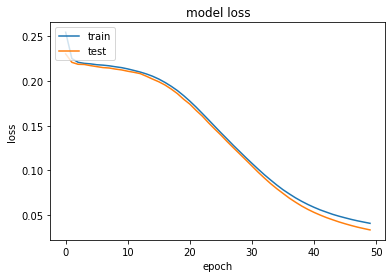

In [21]:
if AUFGABE_5 :

  #################################################################
  #   Die gespeichert Pandas-Datei einlesen 
  #   und X_Train, y_train erzeugen
  #################################################################
  DATEIPFAD = BASEDIR + '/Data_Input/' + 'weinsorten.csv'

  # Aus Datei einlesen
  df_in=pd.read_csv(DATEIPFAD)


  X_train       = ml.pandas_to_numpy_matrix(df_in, ['Alkohol', 'Apfelsaeure', 'Asche', 'Alkanitaet', 'Magnesium','Phenole', 'Flavonoide', 'Non_Flavonoide', 'Proanthocyanidine', 'Farbintensitaet', 'Farbton', 'Protein', 'Prolin'])
  y_train_label = ml.pandas_to_numpy_matrix(df_in, ['Label'])


  y_train = np.full((y_train_label.shape[0],3), 0)

  for i in range(y_train_label.shape[0]):
    if   y_train_label[i] == 1 :
      y_train[i] = [1.0,0.0,0.0]
    elif y_train_label[i] == 2:
      y_train[i] = [0.0,1.0,0.0]
    elif y_train_label[i] == 3:
      y_train[i] = [0.0,0.0,1.0]
    else:
      y_train[i] = [0.0,0.0,0.0]


  print("#############################################################")
  print("Standardisierung der Daten ab hier ")

  #Aufteilen der Daten in Trainings-,Validierungs und Testdatensatz
  X_train, X_test, X_validation, y_train, y_test, y_validation  = ml.split_matrix_horizontal(X_train, y_train)

  # Standardisierung der Eingabedaten
  X_train_std, x_train_means, x_train_standard_deviations = ml.standardisation_of_matrix_columns(X_train)

  X_test_std = ml.scale_of_matrix_columns(X_test, x_train_means, x_train_standard_deviations)
  X_validation_std = ml.scale_of_matrix_columns(X_validation, x_train_means, x_train_standard_deviations)

  y_train_std = y_train
  y_validation_std = y_validation
  y_test_std = y_test

  U, s, Vt = np.linalg.svd(X_train_std)

  #Hauptkomponentenanalyse 

  anzahl_dimensionen = 4         
 
  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren


  # Eingabedaten

  X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
  X_test_reg  = X_test_std.dot(Wpca)     
  X_validation_reg   = X_validation_std.dot(Wpca)


  import keras as keras

  # Keras unterstuetzt (vermulich historisch bedingt) zwei verschiedene Arten der 
  # Definition der Netzwerktopologie:
  # 1.) Sequential-API: Dieses ist ausschliesslich dafuer ausgelegt 
  #     "Multi-Layer-Perceptrons" zu definieren, also solche Topologien, bei denen alle
  #     Ausgaben der Schicht N auf alle Neuronen der Schicht N+1 gehen und es keine
  #     Rueckkopplungen gibt. Vermutlich war dies zunächst das einzige API.
  # 2.) Functional-API: Mit dieser API können neben "Multi-Layer-Perceptrons"
  #     nahezu beliebige Topologien definiert werden. Dies ist also das 
  #     maechtigere Interface.
  USED_API = "Functional"

  # Parametrierung ob je Epoche die Werte der Gewichte ausgegeben werden sollen
  #USE_CALLBACK_ON_EPOCH_BEGIN = True
  USE_CALLBACK_ON_EPOCH_BEGIN = False

  # Keras erlaubt es fuer verschiedene "Zeitpunkte" des Trainigs und des Testes
  # sogenannte Call-Back-Funktionen (kurz Call-Backs) anzugeben. Diese Call-Backs
  # werden durch Keras beim Erreichen des jeweiligen "Zeitpunktes" aufgerufen.
  # Call-Backs werden haeufig fuer Monitoringzwecke genutzt
  # aber auch zur Sicherungen des aktuellen Trainingsstandes
  # des Netzes (z.B. Sicherung aller Gewichte nach jeder Epoche).
  # Im Folgenden sind die typischen von Keras unterstuetzten Call-Backs (Zeitpunkte)
  # aufgefuehrt. Wir verwenden de facto aber nur den Call-Back fuer 
  # den "Zeitpunkt" on_epoch_begin. Dieser wird also jeweils zu Anfang einer
  # Epoche aufgerufen.
  class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
      # Leider ist es so, dass bei Verwendung der Functional-API die Multiplexer-Schicht
      # mitgezaehlt wird un den Index 0. Der erste "echte" Layer hat dann den Index 1 uws.
      # Dagegen wird bei der Verwendung der Sequential-API die Multiplexer-Schicht nicht mitgezaehlt.
      # Der erste "echte" layer hat hier dann den Index 0.
      # Daher ist hier die nun folgende Fallunterscheidung notwendig

      if USE_CALLBACK_ON_EPOCH_BEGIN == True: 
        if USED_API == "Functional" :
          weights_layer1 = network.layers[1].get_weights()[0] 
          biases_layer1 = network.layers[1].get_weights()[1] 
          weights_outputlayer = network.layers[2].get_weights()[0]
          biases_outputlayer = network.layers[2].get_weights()[1] 

        
        print ("Gewichte Layer 1: ", weights_layer1)
        print ("Gewichte Layer 2: ", weights_outputlayer)
        print ("Bias Layer 1", biases_layer1)
        print ("Bias Layer 2", weights_outputlayer) 
    
    # Hier die weiteren typischen Call-Backs, die jeweils nur mit einer
    # Dummy-Funktionalitaet versehen sind
    def on_train_begin(self, logs=None):
        dummy = 1
    def on_train_end(self, logs=None):
        dummy = 1
    def on_epoch_end(self, epoch, logs=None):
        dummy = 1
    def on_test_begin(self, logs=None):
        dummy = 1
    def on_test_end(self, logs=None):
        dummy = 1
    def on_predict_begin(self, logs=None):
        dummy = 1
    def on_predict_end(self, logs=None):
        dummy = 1
    def on_train_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_train_batch_end(self, batch, logs=None):
        dummy = 1
    def on_test_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_test_batch_end(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_begin(self, batch, logs=None):
        dummy = 1
    def on_predict_batch_end(self, batch, logs=None):
        dummy = 1


  ##################################################################################################
  #                        Importieren der notwendigen Bibliotheken
  ##################################################################################################
  
  from keras import models
  from keras import layers  
  from keras import optimizers
  from keras import losses
  from keras import metrics
  from keras import activations
  from keras import Input

  # Wird benoetigt wenn eine Zufallsverteilung der Gewichtswerte vorgegeben werden soll
  from tensorflow.keras import initializers

  if USED_API == "Functional" :
    ##################################################################################################
    #                     1.)  Definition des Netzwerkes mittels Functional-API
    #
    # Die Functional-API ist deutlich maechtiger als die Sequentional-API. 
    # Mit der Functional-API lassen sich z.B. Datenstroem (Layer) auch aufteilen und wieder 
    # zusammen fuehren.
    # Daher werden wir fortan mit der Functional API arbeiten.
    ##################################################################################################
    
    # 1a.) Parameter fuer Definition angeben
    # Ermittlung der Dimensionen der Eingabe und Soll-Ausgabedaten
    rows, cols = X_train_reg.shape
    yrows, ycols = y_train_std.shape

    
    # Die Anzahl der Neuronen in der Ausgabschicht muss gleich der Anzahl der Klassen sein. 
    # In diesem Fall haben wir 4 moegliche Klassen in die die Muenzen eingeteilt werden.
    anz_neuronen_ausgabeschicht = ycols

    # Die Anzahl der Neuronen in der ersten verdeckten Schicht.
    anz_neuronen_erste_verdeckte_schicht = 8

    # Die Anzahl der Neuronen in der zweiten verdeckten Schicht.
    anz_neuronen_zweite_verdeckte_schicht = 4

    # Anzahl der Elemente im Merkmalsvektor. 
    # In diesem Fall enthalten die Eingabedaten die Merkmale "Durchmesser" und "Farbe", also den Wert 2
    # oder allgemeiner den oben schon fuer cols berechneten Wert.
    # ACHTUNG: Der Bias wird unter Keras nicht als "echter/externe" Input verwaltet (da nur intern) 
    # und wird daher beim Merkmalsvektor (der ja extern angelegt wird) nicht mitgezaehlt. 
    # Intern wird der Bias durch Keras aber sehr wohl (automatisch) immer mit angelegt und verwaltet.
    anzahl_merkmale = cols 

    # Art der Aktivierungsfunktion 
    ACTIVATION_FUNCTION =  activations.sigmoid       


    # 1b.) Aufruf der Netzwerk-Definition
    
    # Ganz links stehen die Ausgabe-Tensoren, ganz rechts (bzw. unten) die Eingabetensoren
    input_layer    = Input             (shape=(anzahl_merkmale)) # Anzahl der Merkmalswerte die gemultiplext werden muessen

    hidden_layer_1 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION,
                                        # Optional kann hier die Zufallsverteilung fuer die Gewichteswerte vorgegeben werden.
                                        # DIES WIRD HIER NUR GEMACHT DAMIT MAN SIEHT WIE ES GEHT INHALTLICH NOTWENDIG IST DAS HIER NICHT.
                                        # Wenn keine Angabe erfolgt so wird der GlorotNormal-Initialisierer
                                        # verwendet der ein oftmals gute Zufallsverteilung abhaengig von der Anzahl der 
                                        # Layer-Inputs und der Anzahl der Layer-Neuronen berechnet und 
                                        # entsprechend die Gewichte initialisiert (siehe https://keras.io/api/layers/initializers/)
                                        kernel_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05), # Initialisierung der "normalen" Gewichte
                                        bias_initializer=initializers.RandomNormal(mean=0.01, stddev=0.05)    # Initialisierung der Bias-Gewichte
   
                                       )                             ( input_layer )

    hidden_layer_2 = layers.Dense      (anz_neuronen_erste_verdeckte_schicht,  
                                        activation=ACTIVATION_FUNCTION
                                       # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.
    
                                       )                            ( hidden_layer_1 )

    output_layer   = layers.Dense      (anz_neuronen_ausgabeschicht,  
                                        activation=ACTIVATION_FUNCTION
                                        # Hier erfolgt keine Vorgabe der Zufallsverteilung fuer die Gewichtswerte.

                                       )                             ( hidden_layer_2 )



    network = models.Model( input_layer, output_layer) 



  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  
  # 2a.) Parameter fuer das Compilieren angeben
  step_size   = 0.1     # Sprungweite (alias Ungeduldigkeitsfaktor, alias Lernrate)

  OPTIMIZER = optimizers.SGD(learning_rate=step_size) # Art des Optimierer-Modells. Bisher haben wir nur das
                                                      # einfache Gradientenabstiegsverfahren, hier
                                                      # SDG (Stochastic-Gradient-Descent) genannt, kennen gelernt.
                                                      # Eigentlich ist SDG (gemaess dem ML-Skript aber auch gemaess
                                                      # vieler weitere Literaturquellen) der falsche Name.
                                                      # Es muesste eigentlich Mini-Batch genannt werden,
                                                      # denn eine Batch-Size kann und wird gleich auch noch angegeben.
  
 

  
  LOSSES = losses.MeanSquaredError()                  # Fehlermodell. D.h. der durch das Fehlermodell berechnete Fehlerwert (loss)
                                                      # wird versucht im Rahmen des Trainings zu minimieren

  METRIC_1 = metrics.MeanSquaredError()               # Metrik fuer die Validierung. Nach jeder Epoche werden
                                                      # die Validierungsdaten einmal durch das Netz "gejagt" und basierend
                                                      # auf den so erzeugten Ausgabe-Ist und den Ausgabe-Sollwerte ein 
                                                      # Fehler-Wert berechnet. Naheliegend ist es als
                                                      # Fehlermetric die gleiche "Formel" wie für das Fehlermodell
                                                      # zu verwenden. Dies ist aber nicht zwingend notwendig.
                                                      # Im Falle einer Klassifikation macht die Accuracy als
                                                      # Metrik Sinn.
                                                      
  METRIC_2 = metrics.CategoricalAccuracy()            # Es koennen auch mehrere Metriken angegeben werden, 
                                                      # die dann auch alle berechnet werden. 
                                                      #
                                                      # Die hier ausgewaehlte  CategoricalAccuracy ist
                                                      # fuer die Anwendung auf One-Hot-Ausgabevektoren 
                                                      # vorgeshehen und berechnet mit welcher prozentualen
                                                      # Haeufigkeit der Ist-Ausgabevektor
                                                      # (wenn dieser noch einer "Maxwert-Bereinigung" unterzogen wird,
                                                      # d.h. die Komponente mit dem maximalen Wert wird auf 1 gesetzt,
                                                      # alle anderen Komponenten werden auf 0 gesetzt) 
                                                      # dem Soll-Ausgabevektor entspricht. 
                                                      # Eine so berechnete Accuracy von 1.0 entspricht 
                                                      # dann einer prozentualen Haeufigkeit von 100%.  

  # 2b.) Aufruf des Compilierens mit einer Metrik
  network.compile(optimizer   =       OPTIMIZER,
                  loss        =       LOSSES ,
                  metrics     =   [   METRIC_1 ,  METRIC_2  ])
  

  
  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  
  # 3a.) Parameter fuer das Training angeben
  batch_size  = 4      # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 50    # Anzahl der Epochen, die Trainiert werden soll
  
  # 3b.) Aufruf des Trainings 
  history = network.fit(X_train_reg,                    # Eingabedaten  
                        y_train_std,                    # Ausagbedaten
                        epochs=max_epochs,                # Anzahl Epochen die trainiert werden soll
                        batch_size=batch_size,          # Batch-Size
                        callbacks=[CustomCallback()],   # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                        verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                        validation_data=(X_validation_reg, y_validation_std) # Angabe der Validierunsgdaten
                                                                             # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                        )
  
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Testdaten:")
  print("-------------------------")
  score = network.evaluate(X_test_reg, y_test_std, verbose=1)           # Das NN wird mit den Testdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.
  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Trainingsdaten:")
  print("-------------------------")
  score = network.evaluate(X_train_reg, y_train_std, verbose=1)

  print('--------------------------------------------------------------------------------------------------------------')
  print("Ergebnisse bezueglich der Validierungsdaten:")
  print("-------------------------")
  score = network.evaluate(X_validation_reg, y_validation_std, verbose=1)      # Das NN wird mit den validierungsdaten getestet
                                                                        # verbose =1 => Die Werte fuer Losses und Metriken
                                                                        # werden direkt ausgegeben.


  
  # Zur Uebersichtlichkeit hier noch einmal eine etwas formartierte Ausgabe der Losses und Metriken
  print('Test Losses,   also MSE:',       score[0])
  print('Test Metric_1, also MSE:',       score[1])
  print('Test Metric_2, also Accuracy:',  score[2])

  print(history.history.keys())   # Zeigt alle aufgezeichneten Datenkategorien an
                                  # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                  # (hier z.B. 'val_mean_squared_error' ) man das 
                                  # plt.plot(history.history[Schluesselwort]) "fuettern kann"
  
  

  # Angabe der Labelnamen fuer die Funktion def ml.calculate_confusion_matrix(model, X_test, y_test, label_names, labels)
  label_names = ["1","2","3"]
  # Die zu den Labeln gehoerende Zahlen (Position des Vektors der 1 sein muss um die entsprechende Klasse anzugeben).
  labels = [0,1,2]

  # Erstellen und anzeigen einer Confusion Matrix
  print("Confusion Matrix")
  ml.calculate_confusion_matrix(network, X_test_reg, y_test_std, label_names,labels)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

